# VAE Deep learning to estimate mobility for organic molecules*

#### Load, view, and preprocess dataset
- Load mobility dataset containing many organic molecules and their associated mobility
- Pre-process data and split to test/train sets
[QM9](http://moleculenet.ai/datasets-1)
QM9 (structure): Geometric,  energetic, electronic and thermodynamic properties of DFT-modelled small molecules dataset to train our models. 
The QM9 dataset contains the mobility of various small organic molecules.
We'll also preprocess the dataset and create train/test splits for the Convolutional Neural Network (CNN) and Variational AutoEncoder (VAE) models.
QM9 is a comprehensive dataset that provides geometric, energetic, electronic and thermodynamic properties for a subset of GDB-17 database, comprising 134 thousand stable organic molecules with up to 9 heavy atoms.  All molecules are modeled using density functional theory (B3LYP/6-31G(2df,p) based DFT).

    - "mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
    - "A" - Rotational constant (unit: GHz)
    - "B" - Rotational constant (unit: GHz)
    - "C" - Rotational constant (unit: GHz)
    - "mu" - Dipole moment (unit: D)
    - "alpha" - Isotropic polarizability (unit: Bohr^3)
    - "homo" - Highest occupied molecular orbital energy (unit: Hartree)
    - "lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
    - "gap" - Gap between HOMO and LUMO (unit: Hartree)
    - "r2" - Electronic spatial extent (unit: Bohr^2)
    - "zpve" - Zero point vibrational energy (unit: Hartree)
    - "u0" - Internal energy at 0K (unit: Hartree)
    - "u298" - Internal energy at 298.15K (unit: Hartree)
    - "h298" - Enthalpy at 298.15K (unit: Hartree)
    - "g298" - Free energy at 298.15K (unit: Hartree)
    - "cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
    - "u0_atom" - Atomization energy at 0K (unit: kcal/mol)
    - "u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
    - "h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)
    - "g298_atom" - Atomization free energy at 298.15K (unit: kcal/mol)
  "u0_atom" ~ "g298_atom" (used in MoleculeNet) are calculated from the
  differences between "u0" ~ "g298" and sum of reference energies of all
  atoms in the molecules, as given in
 [here](https://figshare.com/articles/Atomref%3A_Reference_thermochemical_energies_of_H%2C_C%2C_N%2C_O%2C_F_atoms./1057643).
 [here](https://github.com/deepchem/deepchem/blob/master/deepchem/molnet/load_function/qm9_datasets.py)


we will plot a histogram of SMILES string lengths from dataset. These lengths will be used to determine the length of the inputs for our CNN and VAE models. 
Below are examples of the SMILES representation: 
1. Methane: 'C'
2. Pentane: 'CCCCC'
3. Methanol and Ethanol: 'CO' and 'CCO'
4. Pyridine: 'C1:C:C:N:C:C:1'

To learn more about the SMILES representation, click [here](https://chem.libretexts.org/Courses/University_of_Arkansas_Little_Rock/ChemInformatics_(2017)%3A_Chem_4399%2F%2F5399/2.3%3A_Chemical_Representations_on_Computer%3A_Part_III).

#### Data preparation

First, we'll get the unique character set from all SMILES strings in the dataset. 
Then we will use the unique character set to convert our SMILES strings to a one-hot representation, which is a representation that converts raw strings of text to numerical inputs for our models.

In a one-hot representation, each character of our SMILES string is encoded as a vector of zeros, except for one non-zero value. For instance, the character 'C' in the SMILES string is converted to a vector of length 31, consisting of 30 zeros and one non-zero entry of one. The length of this vector (31 in our case) is the total number of unique characters in the dataset.

Given a string of 5 characters (say Pentane, which is represented as 'CCCCC'), we would thus get 5 vectors each of length 31. Since different molecules have different SMILES string lengths, we can pre-define the length of each string to be the maximum length from the database, with smaller molecules represented with additional characters. In our case, this maximum length is 40 and we represent the extra characters for smaller molecules with pre-defined one-hot vectors. This means that each molecule is now represented as a set of 40 vectors, each of length 31. We can represent this as a 40x31 matrix.

One-hot encoding is commonly used in natural language processing, and you can learn more about one-hot encoding [here](https://en.wikipedia.org/wiki/One-hot). 

Let's briefly visualize what our input data looks like using a heatmap that shows the position of each character in the SMILES string, you can change the index to see various molecules. Each molecule is represented by a 40x31 sparse matrix, the bright spots in the heatmap indicate the position at which a one is found in the matrix. For instance, the first row has a bright spot at index 18, indicating that the first character is 'C'. The second row has a bright spot at index 23, which indicates that the second character is 'O'. For the compound Dimethoxymethane with a SMILES string 'COCOC', we expect the matrix to have alternating bright spots at index 18 and index 23 for the first five rows. Beyond that, the rows all have a bright spot at index 1, which stands for the extra characters padded on to our string to make all SMILES strings the same length. The heatmap below is plotted using the [Seaborn](https://seaborn.pydata.org/) library.

Finally, we will define our input and output and create test/train splits in the dataset.

#### Train a Convolutional neural network (CNN) 
- Train a CNN to predict Mobility
- Predict mobility from any given SMILES representation of a molecule 

#### Train a Variational autoencoder (VAE)
- Train a VAE to take an encoded SMILES as input and learn a mapping from encoded SMILES to latent space and back to the input
- Use a portion of the VAE to generate SMILES by sampling from a unit gaussian

[Keras](https://keras.io/) 
[Tensorflow](https://www.tensorflow.org/)
[Pandas](https://pandas.pydata.org/) 
[Numpy](https://numpy.org/)

In [ ]:
#!conda env list
#!conda update -n base conda 
#!conda create -n py37 python=3.7
#!conda create -n yaml24 yaml=0.2.4 -c conda-forge -y
#!conda info --envs
#!conda remove -n <envs_name> --all
#!source debian10/anaconda/anaconda-7/bin/activate
#!python -V
#!conda activate py37
#!python -V
#!conda deactivate 
#!python -V
#!python -m pip install --user <pacakge>
#!pip3 show <pacakge>
#!pip3 list
#!pip3 install pipreqs
#!pipreqs .
#!
#!
#!python -m pip install --user pymatgen
!python -m pip install --user matminer
#!python -m pip install --user mendeleev
#!python -m pip install --user keras_sequential_ascii
#!python -m pip install --user -U kaleido
#!python -m pip install --user plotly
#!conda install -c plotly plotly-orca
# import sys
#print(sys.path)
#!python -m pip install --user <pacakge>
#!python -m pip install --user  python-utils 
#!conda install -c conda-forge python-utils -y
#conda install -c conda-forge/label/gcc7 python-utils
#!python -m pip install --user livelossplot
from subprocess import call
import gzip
#from google.colab import drive
#drive.mount('/content/gdrive')
#!ls gdrive/MyDrive/'Colab Notebooks'/data/qm9.csv
#!ls /home/nanohub/bbishnoi/data/results/vae/qm9.csv 
#!ls /home/nanohub/bbishnoi/data/results/1909584/citrinednn/bin/utils.py
#!python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose
#!ls /apps/citrinednn/r15/bin/utils.py
#print(tf.__version__)

In [ ]:
def extract_data(filename, num_data, head_size, data_size): # This function loads and parses the data
    with gzip.open(filename) as bytestream:
        bytestream.read(head_size)
        buf = bytestream.read(data_size * num_data)
        data = np.frombuffer(buf, dtype=np.uint8)
    return data

def load_data():
    call("wget -nc https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz  -o " + os.getcwd() + "t10k-images-idx3-ubyte.gz", shell=True)
    call("wget -nc https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz -o " + os.getcwd() + "train-images-idx3-ubyte.gz", shell=True)
    call("wget -nc https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz -o " + os.getcwd() + "train-labels-idx1-ubyte.gz", shell=True)
    call("wget -nc https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz -o " + os.getcwd() + "t10k-labels-idx1-ubyte.gz", shell=True)

    testImages = extract_data(os.getcwd()  + '/t10k-images-idx3-ubyte.gz', 10000, 16, 28*28)
    trainImages = extract_data(os.getcwd() + '/train-images-idx3-ubyte.gz', 60000, 16, 28*28)
    trainLabels = extract_data(os.getcwd() + '/train-labels-idx1-ubyte.gz', 60000, 8, 1)
    testLabels = extract_data(os.getcwd()  + '/t10k-labels-idx1-ubyte.gz', 10000, 8, 1)

    return trainImages,testImages,trainLabels,testLabels


trainImages,testImages,trainLabels,testLabels = load_data()

trainImages = (np.reshape(trainImages,(60000, 28, 28))).astype(np.uint8)
testImages = (np.reshape(testImages,(10000, 28, 28))).astype(np.uint8)
trainLabels = (np.reshape(trainLabels,(60000, 1))).astype(np.uint8)
testLabels = (np.reshape(testLabels,(10000, 1))).astype(np.uint8)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Label Classes

In [ ]:
#!python -m pip install --user pymatgen-db
from pymatgen.db import QueryEngine
qe = QueryEngine()

import os, stat
from IPython.display import clear_output

try:
    user = str(input())
    clear_output()
    if user == None:
        raise TypeError('Empty')
    with open(os.path.expanduser('~/.wolframkey.txt'), 'w') as keyfile:
        keyfile.write(user)
    os.chmod(os.path.expanduser('~/.wolframkey.txt'), stat.S_IREAD | stat.S_IWRITE)
    del user
    print("Success")
except:
    print("Something seems wrong with your key")

In [ ]:
import os, stat
from IPython.display import clear_output

try:
    user = str(input())
    clear_output()
    if user == None:
        raise TypeError('Empty')
    with open(os.path.expanduser('~/.citrinekey.txt'), 'w') as keyfile:
        keyfile.write(user)
    os.chmod(os.path.expanduser('~/.citrinekey.txt'), stat.S_IREAD | stat.S_IWRITE)
    del user
    print("Success")
except:
    print("Something seems wrong with your key")

In [ ]:
# These lines import both libraries and then define an array with elements to be used below

#Citrination
from citrination_client import *
from matminer.data_retrieval.retrieve_Citrine import CitrineDataRetrieval
#Wolframalpha
import wolframalpha

#Misc. Tools
import matplotlib.pyplot as plt
import pandas as pd

#Import WolframAlpha API Key
file = open(os.path.expanduser('~/.wolframkey.txt'),"r+")
apikey_wolfram = file.readline()
file.close()

#Import Citrine API Key
file = open(os.path.expanduser('~/.citrinekey.txt'),"r+")
apikey_citrine = file.readline()
file.close()

In [ ]:
import os, stat
from IPython.display import clear_output

try:
    user = str(input())
    clear_output()
    if not user.isalnum():
        raise TypeError('Wrong Key')
    if user == None:
        raise TypeError('Empty')
    with open(os.path.expanduser('~/.mpkey.txt'), 'w') as keyfile:
        keyfile.write(user)
    os.chmod(os.path.expanduser('~/.mpkey.txt'), stat.S_IREAD | stat.S_IWRITE)
    del user
    print("Success")
except:
    print("Something seems wrong with your key")

In [ ]:
# These lines import both libraries and then define an array with elements to be used below

#Pymatgen and sub-libraries

#import pymatgen as pymat
#import mendeleev as mendel
import pymatgen
#from pymatgen import MPRester, Composition, Element, Structure
from pymatgen.ext.matproj import MPRester, Composition, Element, Structure

#Misc. Tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Import API Key
file = open(os.path.expanduser('~/.mpkey.txt'),"r+")
apikey = file.readline()
file.close()
rester = MPRester(apikey)

In [ ]:
# These lines import both libraries and then define an array with elements to be used below

#Pymatgen and sub-libraries
import pymatgen
from pymatgen.ext.matproj import MPRester, Composition, Element, Structure
from pymatgen.io.vasp import Vasprun
from pymatgen.entries.computed_entries import ComputedEntry
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
from pymatgen.util.plotting import *
from pymatgen.analysis.phase_diagram import *
#import pymatgen.core.composition
from pymatgen.apps.borg.hive import VaspToComputedEntryDrone
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
import json

#This is a utility function that will transform the chemicalFormula column into a Matminer composition object, which will be then used to extract features.
def get_compostion(c): # Function to get compositions from chemical formula using pymatgen
    try:
        return Composition(c)
    except:
        return None


#Misc. Tools
import matplotlib.pyplot as plt
import random
import os
from itertools import combinations

#Import API Key
file = open(os.path.expanduser('~/.mpkey.txt'),"r+")
apikey = file.readline()
file.close()
#Define MP API rester key
rester = MPRester(apikey)

In [ ]:
# https://hackingmaterials.lbl.gov/matminer/featurizer_summary.html
#https://github.com/CitrineInformatics/lolo/blob/develop/python/examples/ling-immi-2017.ipynb
from matminer.data_retrieval.retrieve_Citrine import CitrineDataRetrieval
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from lolopy.learners import RandomForestRegressor

from matminer.datasets import get_available_datasets
#from matminer.data_retrieval.retrieve_Citrine import CitrineDataRetrieval
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval
get_available_datasets()

def get_compostion(c): # Function to get compositions from chemical formula using pymatgen
    try:
        return Composition(c)
    except:
        return None
    
data['composition'] = data['chemicalFormula'].apply(get_compostion) # Transformation of chemicalformula string into Matminer composition
data['Measuring Temperature'] = pd.to_numeric(data['Measuring Temperature'], errors='coerce') # Transformation of Measuring Temp dataframe column from type <str> to a numberic type <int>
data[property_interest] = pd.to_numeric(data[property_interest], errors='coerce') # Transformation of our property of interest dataframe column from type <str> to a numberic type <int>

data = data[data['Crystallographic Structure'] == 'Cubic'] # Filter all non-cubic structures
data = data[data['Measuring Temperature']<30] # Filter all high temperature measurements (over room temperature)
data = data[data['Measuring Temperature']>18] # Filter all low temperature measurements (over room temperature)

data.reset_index(drop=True, inplace=True) # Reindexing of dataframe rows

#Before removing duplicates, we will store all the experimental values for compositions that include Tantalum.
ta_indexes = []
for _ in range(len(data)):
    if ("Zr" in data['composition'][_] and "Ta" in data['composition'][_] and len(data['composition'][_])==5):
        ta_indexes.append(_)
    elif ("Zr" in data['composition'][_] and len(data['composition'][_])==4):
        ta_indexes.append(_) 
        
ta_dataframe = data[data.index.isin(ta_indexes)]
#display(ta_dataframe)        
        
x_values_exp = [_["Ta"] for _ in list(ta_dataframe['composition'])]
y_values_exp = list(ta_dataframe['Ionic Conductivity'])

# In order to reduce noise in the neural network and deal with the inconsistencies in the data, we will filter repeated composition values from different measurements and replace the value for ionic conductivity with the median of the values.

dup_indexes = data[data.duplicated(subset = data.columns.tolist()[0], keep=False)].index.tolist()

dup_dataframe =data[data.duplicated(subset = data.columns.tolist()[0], keep=False)]

#duplicates = [[dup_dataframe.iloc[x][0], dup_dataframe.iloc[x][4], dup_indexes[x]] for x in range(len(dup_dataframe.index))]
duplicates = [[dup_dataframe.iloc[x][0], dup_dataframe.iloc[x][4], dup_indexes[x], dup_dataframe.iloc[x][-2]] for x in range(len(dup_dataframe.index))]
duplicate_compositions = {k: [] for k in set([dup_dataframe.iloc[x][0] for x in range(len(dup_dataframe.index))])}
duplicate_indexes = {k: [] for k in set([dup_dataframe.iloc[x][0] for x in range(len(dup_dataframe.index))])}
duplicate_years = {k: [] for k in set([dup_dataframe.iloc[x][0] for x in range(len(dup_dataframe.index))])}

for _ in duplicates:
    duplicate_compositions[_[0]].append(_[1])
    duplicate_indexes[_[0]].append(_[2]) 
    duplicate_years[_[0]].append(_[3])

for k in duplicate_compositions:
    
    duplicate_compositions[k] = np.median(duplicate_compositions[k])
    data.at[duplicate_indexes[k][0], 'Ionic Conductivity'] = duplicate_compositions[k]  

    duplicate_years[k] = np.min(duplicate_years[k])
    data.at[duplicate_indexes[k][0], 'Year Published'] = duplicate_years[k]      
    data = data.drop(duplicate_indexes[k][1:], axis = 0)

data = data.reset_index()
data = data.drop(['index'], axis = 1)
    
# After removing duplicates, we will query the dataset for the values that were substituted for the Tantalum compositions, the median of the experimental values.
    
ta_indexes = []
for _ in range(len(data)):
    if ("Zr" in data['composition'][_] and "Ta" in data['composition'][_] and len(data['composition'][_])==5):
        ta_indexes.append(_)
    elif ("Zr" in data['composition'][_] and len(data['composition'][_])==4):
        ta_indexes.append(_)        
        
ta_dataframe = data[data.index.isin(ta_indexes)]
#display(ta_dataframe)

x_values_dupmed = [_["Ta"] for _ in list(ta_dataframe['composition'])]
y_values_dupmed = list(ta_dataframe['Ionic Conductivity'])

sort_dupmed = list(zip(x_values_dupmed, y_values_dupmed))
sort_dupmed = sorted(sort_dupmed, key = lambda t: t[0])

x_values_dupmed = [item[0] for item in sort_dupmed ] 
y_values_dupmed = [item[1] for item in sort_dupmed ]     

#The next cell produces a breakdown of the number of elements in the oxides compositions and a distribution of the elements present in the dataset.

import collections

freq = data["composition"]
list_freq = []

for _ in freq:
    a = [str(x) for x in _]
    list_freq.append(a)
    
list_freq_flat = [item for sublist in list_freq for item in sublist]  
listfreqctr = collections.Counter(list_freq_flat)
print(listfreqctr)
    
lengths = list(map(len,list_freq))
lenctr = collections.Counter(lengths)

print(lenctr)
# print(type(freq[0]))
# print(freq[0])
# print(list(freq[0])[0])

# print(type(list(freq[0])[0]))
# print(str(list(freq[0])[0]))
    
# Featurizer
f =  MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"), cf.ValenceOrbital(props=['avg']), cf.ElementFraction()]) # Featurizers

X = np.array(f.featurize_many(data['composition'], ignore_errors=True)) # Array to store such features

measuring_temp_array = np.array(data['Measuring Temperature']).reshape(-1,1) # Here we are stacking the Measuring temperature numpy array into the features previously calculated to add it as a descriptor. 
X = np.hstack((X,measuring_temp_array))

y = data[property_interest].values # Separate the value we want to predict to use as labels.
years = data["Year Published"].values

# This code is to drop columns with std = 0. 
x_df = pd.DataFrame(X)
x_df = x_df.loc[:, x_df.std() != 0]
print(x_df.shape) # This shape is (#Entries, #Descriptors per entry)

# This code is to drop columns with std = 0. 
x_df_prior = pd.DataFrame(X)

x_df

# Featurizer
f =  MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                         cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])
# Inputs
X = np.array(f.featurize_many(data['composition']))
# Labels 
y = data[property_interest].values 

In [ ]:
data = rester.query({"elements": "O", "nelements": {"$gte": 2}},
                    ["task_id","pretty_formula","formula","volume","density","elements",
                     "e_above_hull","elasticity","unit_cell_formula"])

In [ ]:
rester.query('mp-230',['pretty_formula','band_gap','final_structure'])

In [ ]:
print('Number of oxide structures available on the MP database: %s' % len(data))
print('Example output: %s' % data[0])

In [ ]:
df_oxide = pd.DataFrame.from_dict(data)
display(df_oxide)

In [ ]:
energy_cutoff_value = 1 #energy above convex hull cutoff [meV]
df_oxide = df_oxide[df_oxide['e_above_hull'] <= (energy_cutoff_value/1000)]  

In [ ]:
display(df_oxide)
df.head()

In [1]:
# general imports
%matplotlib inline
import tensorflow as tf
import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
import pandas as pd
import seaborn as sns
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.express as px
import numpy as np
#import pymatgen as pymat
#import mendeleev as mendel
from subprocess import call
import gzip

from scipy.stats import norm
from IPython.display import HTML

# keras imports
from keras.layers import (Input, Dense, Conv1D, MaxPool1D, Dropout, GRU, LSTM, TimeDistributed, Add, Flatten, RepeatVector, Lambda, Concatenate)
from keras.models import Model, load_model
from keras.metrics import binary_crossentropy
from keras import initializers, regularizers
from keras.callbacks import EarlyStopping
import keras.backend as K

# Visualization
from keras_sequential_ascii import keras2ascii

# from utils import label_map_util
# from utils import visualization_utils as vis_util

#from object_detection.utils import label_map_util
#from object_detection.utils import visualization_utils as vis_util

# utils functions
from python_utils import *
#from utils import *

# Hacky MacOS fix for Tensorflow runtimes... (You won't need this unless you are on MacOS)
# This fixes a display bug with progress bars that can pop up on MacOS sometimes.
#import sys
#import os
#sys.path.insert(0, '../src/')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Remove warnings from output
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!ls /home/nanohub/bbishnoi/data/results/vae/qm9.csv
#dataset = pd.read_csv("/home/nanohub/bbishnoi/data/results/vae/qm9.csv")
# read dataset as a dataframe
#dataset = pd.read_csv("../data/ESOL_delaney-processed.csv")

from random import shuffle
dataset = pd.read_csv("./qm9.csv")
#dataset = pd.read_csv("gdrive/MyDrive/Colab Notebooks/data/qm9.csv")

# This function randomly arranges the elements so we can have representation for all groups both in the training and testing set
#shuffle(dataset) 

# print column names in dataset
print(f"Columns in dataset: {list(dataset.columns)}")

# print number of rows in dataset
print(f"\nLength of dataset: {len(dataset)}")

# shuffle rows of the dataset (we could do this later as well when doing train/test splits)
dataset = dataset.sample(frac=1, random_state=0)

# show first 5 rows of dataframe
dataset.head()
#dataset.head(20)

Columns in dataset: ['mol_id', 'smiles', 'A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom']

Length of dataset: 133885


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
43225,gdb_43226,O=C1C2CCCC1C=C2,2.19575,1.83375,1.78978,2.8898,78.73,-0.2330,-0.0029,0.2301,...,0.162755,-385.930699,-385.923667,-385.922723,-385.961801,29.000,-1938.509588,-1950.984467,-1961.653375,-1808.771475
18949,gdb_18950,O=CC1C2C3CC2N13,5.76254,1.67862,1.56959,2.2243,65.83,-0.2456,-0.0355,0.2101,...,0.118824,-362.561835,-362.555470,-362.554526,-362.592646,24.065,-1462.630608,-1471.968569,-1480.266121,-1361.585343
65056,gdb_65057,CC1(CO1)C1(CO1)C#C,2.33460,1.50396,1.24794,2.5230,73.97,-0.2620,0.0181,0.2801,...,0.132144,-421.745993,-421.736936,-421.735992,-421.779716,33.773,-1686.271678,-1695.698118,-1705.181034,-1571.293204
27392,gdb_27393,c1c([nH]c(nc1=O)N)O,2.01530,1.87826,0.97339,7.1395,67.95,-0.2213,0.0039,0.2252,...,0.102825,-470.075554,-470.067765,-470.066821,-470.107671,29.926,-1447.261657,-1454.816238,-1462.520166,-1350.407526
51740,gdb_51741,O=COC1CCC11CN1,2.95255,1.08628,0.88017,2.6332,74.49,-0.2540,0.0016,0.2555,...,0.147164,-439.065902,-439.057354,-439.056409,-439.100076,31.201,-1738.070663,-1748.704431,-1758.779715,-1616.381608


In [ ]:
# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)

all_values = [] # Values for Attributes
all_labels = [] # Values for Young's Modulus (Property to be estimated)

all_values = [list(df.iloc[x]) for x in range(len(all_values))]

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float) 
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = float)
print("Shape of Labels:", all_labels.shape)

#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
order = np.arange(49)
all_values = all_values[order]
all_labels = all_labels[order]

# Training Set
train_labels = all_labels[:44]
train_values = all_values[:44]

# Testing Set
test_labels = all_labels[-5:]
test_values = all_values[-5:]

# This line is used for labels in the plots at the end of the tutorial - Testing Set
labeled_elements = [elements[x] for x in order[-5:]] 
elements = [elements[x] for x in order]

# NORMALIZATION

mean = np.mean(train_values, axis = 0) # mean
std = np.std(train_values, axis = 0) # standard deviation

train_values = (train_values - mean) / std # input scaling
test_values = (test_values - mean) / std # input scaling

print(train_values[0]) # print a sample entry from the training set
print(test_values[0]) # print a sample entry from the training set
print(order)

In [ ]:
#df.columns
dataset.columns

In [ ]:
#df.describe()
dataset.describe()

In [ ]:
#df["smiles"]
dataset["smiles"]

In [ ]:
#df.iloc[147] 
dataset.iloc[147] 

In [ ]:
mask = dataset["zpve"] >= -100
nonmetal_dataset = dataset[mask]
nonmetal_dataset
#dataset[mask]

In [ ]:
cleaned_dataset = dataset.drop(["A", "B", "C", "h298"], axis=1)
cleaned_dataset.head()

In [ ]:
dataset[["smiles", "alpha","homo","lumo","gap"]]

In [ ]:
dataset["gap1"] = dataset["lumo"] - dataset["homo"]
dataset["gap1"] >= dataset["gap"]
dataset.head()

In [ ]:
from matminer.featurizers.composition.thermo import CohesiveEnergy
ef = CohesiveEnergy()
#element_fractions = ef.featurize(fe2o3)
#print(element_fractions)
element_fractions = ef.featurize(O=COC1CCC11CN1)
print(element_fractions)
df = ef.featurize_dataframe(df, "composition")
df.head()

In [ ]:
y = dataset['alpha'].values
#"alpha" - Isotropic polarizability (unit: Bohr^3)
print(y)

In [ ]:
X = dataset.drop(["mol_id", "smiles", "homo", "alpha"], axis=1)
print("There are {} possible descriptors:".format(len(X.columns)))
print(X.columns)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X, y)
# y = "alpha" - Isotropic polarizability (unit: Bohr^3)

train_values, test_values = np.split(all_values, [index_split_at])
train_labels, test_labels = np.split(all_labels, [index_split_at])

# We introduce the model here:

from sklearn.ensemble import RandomForestRegressor 

model =  RandomForestRegressor(n_estimators = 2000, random_state = 0) 
model.fit(train_values, train_labels)

test_pred = model.predict(test_values)
all_pred = model.predict(all_values)

training = go.Scatter(x = all_labels, y = all_pred, mode = 'markers', 
                      marker= dict(size= 12, color='green'), name= "All Data")

testing= go.Scatter(x = test_labels, y = test_pred, mode = 'markers', marker= dict(size= 9, color= 'red', symbol = 'x'), name= "Testing Data")

match = go.Scatter(x = [0,20], y = [0,20], mode = 'lines', name = "Match",line= dict( color = 'black'))

traces = [match,training,testing]
fig= go.Figure(traces, layout=layout0)
fig.update_yaxes(automargin=True)
iplot(fig)

###  Random Forests with Sample Uncertainties (FUELS Framework) -- MODEL
https://proxy.nanohub.org/weber/1910229/wwOPefJEgELWDSHq/10/notebooks/ActiveLearning_Figures.ipynb

In [ ]:
# We'll re-process the data

from lolopy.learners import RandomForestRegressor
from lolopy.metrics import root_mean_squared_error

history_table = pd.DataFrame(columns=['Composition','Experimental',"Prediction"])

compositions_examined = np.array(data["chemicalFormula"], dtype = "object") # Storing the composition together with 

all_values = [list(x_df.iloc[x]) for x in range(len(x_df.index))]
all_values = np.array(all_values, dtype = float) 
all_labels = y.copy()


# SHUFFLE AND SPLITTING

all_values, all_labels, compositions_examined = shuffle(all_values, all_labels, compositions_examined, random_state=6)

train_values, test_values = np.split(all_values, [index_split_at])
train_labels, test_labels = np.split(all_labels, [index_split_at])
comp_train, comp_test = np.split(compositions_examined, [index_split_at])

# MODEL AND TRAINING

randomforest_model = RandomForestRegressor(num_trees=500)
randomforest_model.fit(train_values, train_labels)

test_pred, test_std = randomforest_model.predict(test_values, return_std=True)
all_pred, all_std = randomforest_model.predict(all_values, return_std=True)

inner_df = pd.DataFrame()
inner_df["Composition"] = comp_test
inner_df["Experimental"] = test_labels
inner_df["Predictions"] = test_pred
inner_df["residual"] = test_pred - test_labels
inner_df["STD"] = test_std
inner_df = inner_df.sort_values(by='Experimental')
display(inner_df)

mean_rf = mean_absolute_error(test_labels, test_pred)
print(mean_rf)

In [ ]:
fig = plt.figure(figsize = (10,10))

plt.errorbar(all_labels, all_pred, color='green', marker='o', markersize=12, linestyle='None', label='Training Data')
plt.errorbar(test_labels, test_pred, yerr=test_std, color='red', marker='o', markersize=12, linestyle='None',label='Testing Data')
plt.plot([-1, 20], [-1, 20], linestyle='dashed', color='black')
plt.xticks(np.linspace(0,20,11),fontsize=26)
plt.yticks(np.linspace(0,20,11), fontsize=26)
plt.xlim([-1,20])
plt.ylim([-1,20])
plt.grid()
plt.legend(loc=2, fontsize=22)
plt.ylabel('Predicted Conductivity x10$^{-4}$ (S/cm)', fontsize=26)
plt.xlabel('Experimental Conductivity x10$^{-4}$ (S/cm)', fontsize=26)
plt.title('Random Forest', fontsize=26)

fig.show()

### Ta Analysis

In [ ]:
ta_line_comps = []
ta_array = np.linspace(0,1,101) # X-Axis granularity to generate nominal stoichometries
x_values_pred = np.linspace(0,1,101) # X-Axis granulatirty for plotting


# Generating stoichiometric nominal compositions doped with Ta
for stg in ta_array:
    base_equation_string = "Li" + (('%f'%(np.around(7 - stg, decimals=3, out=None))).rstrip('0').rstrip('.')) + "La3" + "Zr" + (('%f'%(np.around(2 - stg, decimals=3, out=None))).rstrip('0').rstrip('.')) + ("Ta" + (('%f'%(np.around(stg, decimals=3, out=None))).rstrip('0').rstrip('.')) if stg > 0 else '') + "O12"
    ta_line_comps.append(base_equation_string)


# Getting descriptors from the chemical formula
    
ta_composition_test_set_dataframe = pd.DataFrame(ta_line_comps, columns=['chemicalFormula'])
ta_composition_test_set_dataframe['composition'] = ta_composition_test_set_dataframe['chemicalFormula'].apply(get_composition) # Transformation of chemicalformula string into Matminer composition
ta_feat_test_set= np.array(f.featurize_many(ta_composition_test_set_dataframe['composition'], ignore_errors=True)) # Array to store such features

ta_temp_array = np.array([25.0 for _ in range(ta_feat_test_set.shape[0])]).reshape(-1,1) # Array of simulated measuring temperatures
ta_feat_test_set = np.hstack((ta_feat_test_set, ta_temp_array))


# We need to drop the same columns that were dropped from the original training set so that this map has the same number of descriptors

# This code is to drop columns with std = 0. 
ta_parsed_features_test_set = pd.DataFrame(ta_feat_test_set)
ta_parsed_features_test_set_2 = ta_parsed_features_test_set.loc[:,  x_df_prior.std() != 0] # Dropping same columns that were dropped on the training data

# Turning these values into an array
ta_values = [list(ta_parsed_features_test_set_2.iloc[x]) for x in range(len(ta_parsed_features_test_set_2.index))]
ta_values = np.array(ta_values, dtype = float) 


# Making predictions
y_values_pred, err_values_pred = randomforest_model.predict(ta_values, return_std=True)


# Plotting
fig = plt.figure(figsize =(10,10))
plt.plot(x_values_exp,y_values_exp, color='blue', marker='o', fillstyle='none', markersize=12, linestyle = "None",  label = "Experiment") # This is from the list of Ta-compositions before dropping duplicates
plt.plot(x_values_dupmed,y_values_dupmed, color='black',  marker='x', markersize=14, linestyle = "None", label = "Median") # This is from the list of Ta-compositions after dropping duplicates

plt.plot(x_values_pred,y_values_pred, color='red', linestyle='solid',label='Prediction') # Predictions
plt.fill_between(np.array(x_values_pred), np.array(y_values_pred)-np.array(err_values_pred), np.array(y_values_pred)+np.array(err_values_pred), facecolor='#EBECF0') # Uncertainty regions

plt.grid()
plt.legend(fontsize=22)
plt.xlabel("Ta Content", fontsize =26)
plt.ylabel("Ionic Conductivity x10$^{-4}$ (S/cm)", fontsize =26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
fig.show()

### Random Forests with Sample Uncertainties (Citrination's Lolopy)

A random forest from the lolopy library is implemented and an equivalent match plot is shown below. This library can yield the sample-wise uncertainties from a model, following the work from Ling et al, and using a combination of the jackknife-after-bootstrap and infinitesimal-jackknife estimates paired with a montecarlo sampling correction. More details on this uncertainty estimates are discussed in the next section.

$$ \sigma^2_i(x) = Cov_j[n_{i,J}, T_J(x)]^2 + [\overline{T}_{-i}(x) - \overline{T}(x)]^2 - \frac{e\nu}{N_T} $$

In [ ]:
#https://github.com/CitrineInformatics/lolo/blob/develop/python/examples/ling-immi-2017.ipynb
train_values, test_values = np.split(all_values, [index_split_at])
train_labels, test_labels = np.split(all_labels, [index_split_at])

from lolopy.learners import RandomForestRegressor

model =  RandomForestRegressor(num_trees=500)
model.fit(train_values, train_labels)

test_pred, test_std = model.predict(test_values, return_std=True)
all_pred, all_std = model.predict(all_values, return_std=True)

training = go.Scatter(x = all_labels, y = all_pred, mode = 'markers', 
                      marker= dict(size= 12, color='green'), name= "All Data")

testing= go.Scatter(x = test_labels, y = test_pred, mode = 'markers', marker= dict(size= 9, color= 'red', symbol = 'x'), name= "Testing Data", error_y=dict(type='data', array=test_std,visible=True))

match = go.Scatter(x = [0,20], y = [0,20], mode = 'lines', name = "Match",line= dict( color = 'black'))

traces = [match,training,testing]
fig= go.Figure(traces, layout=layout0)
fig.update_yaxes(automargin=True)
iplot(fig)

In [ ]:
y_pred = rf.predict(X)
# y = "alpha" - Isotropic polarizability (unit: Bohr^3)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print('training RMSE = {:.3f} Bohr^3'.format(np.sqrt(mse)))

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=kfold)

rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Mean RMSE: {:.3f} Bohr$^3$'.format(np.mean(rmse_scores)))
# y = "alpha" - Isotropic polarizability (unit: Bohr^3)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf, X, y, cv=kfold)

In [ ]:
dataset["alpha predicted"] = y_pred
dataset["percentage_error"] = (dataset["alpha"] - dataset["alpha predicted"]).abs()/dataset["alpha"] * 100
dataset

In [ ]:
# Here we are creating a function that takes a value X (Which will be the Symbol of the Element) 
# and returns a color depending on what its crystal structure is in our arrays from the beginning.
# That is because we want to color data according to the crystal structure; therefore, we will have to pass this info to the plot

def SetColor_CrystalStr(x):
    if x in dataset[dataset.alpha.ge(150)]:
        return "red" #This are standard CSS colors, but you can also use Hexadecimal Colors (#009900) or RGB "rgb(0, 128, 0)"
    elif x in dataset[dataset.alpha.le(50)]:
        return "blue"
    elif x in dataset[dataset.alpha.eq(50)]:
        return "yellow"
    else:
        return "lightgray"
    
# We will then create a list that passes all element symbols through this function. For that we will use the python function "map"    
# Map takes each element on a list and evaluates it in a function.

colors = list(map(SetColor_CrystalStr, mol_id))

# You can see this list of generated colors looks like by uncommenting this line

#print(colors)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

reference_line = go.Scatter(
    x=[0, 200],
    y=[0, 200],
    line=dict(color="black", dash="dash"),
    mode="lines",
    showlegend=False
)

fig = px.scatter(
    dataset, 
    x="alpha", 
    y="alpha predicted", 
    #hover_name="formula", 
    color="percentage_error", 
    color_continuous_scale=px.colors.sequential.Bluered,
)

fig.add_trace(reference_line)
fig.show()

In [ ]:
rf.feature_importances_

In [ ]:
importances = rf.feature_importances_
included = X.columns.values
indices = np.argsort(importances)[::-1]

fig_bar = px.bar(
    x=included[indices][0:5], 
    y=importances[indices][0:5], 
    title="Feature Importances of Random Forest",
    labels={"x": "Feature", "y": "Importance"}
)
fig_bar.show()

## Active Learning

Active learning is the use of algorithms not for regression, but for the improvement of the input sample space that guides the 'experiments' required to get to such maximum values. Even if it does make predictions for a specific material, its main task is the selection of the most likely candidate to be in a global maxima. Global optimization is based on the assumption that a model can perform better when it can "choose" which point to query next. This is the approach introduced in the paper by Julia Ling

## Uncertainty Estimates

The first step on active learning always comes from an approximation of the error in the prediction from the model. Relevant work on how to compute this estimates can be found in publications by [Efron](https://statistics.stanford.edu/sites/g/files/sbiybj6031/f/BIO%20262_0.pdf) and [Wager](https://jmlr.org/papers/volume15/wager14a/wager14a.pdf).

To compute an estimate, we need to understand how to compute some important quantities:

<b> Expected Value: </b> The mean of the predictions over all the decision trees represents the expected value for this particular model. The equation to compute this quantity is shown below:
<br>
<br>
$$ E[M(x)] = \frac{1}{N} \sum\limits_{J}^{n_T} T_J(x) $$
<br>

In this equation:

$E[M(x)] \rightarrow $ Expected value of the prediction of the model at point $x$
<br>
$ T_J(x) \rightarrow $ Prediction of tree index $J$ for point $x$
<br>
$n_T $ is the number of trees
<br>
<br>

<b> Variance: </b> For the calculation of the variance, we will compute the value of the <b>"Variance at point x due to training point i "</b>. For this model, we are following on the work from Ling et al, and using a combination of the jackknife-after-bootstrap and infinitesimal-jackknife estimates paired with a montecarlo sampling correction.

$$ \sigma^2_i(x) = Cov_j[n_{i,J}, T_J(x)]^2 + [\overline{T}_{-i}(x) - \overline{T}(x)]^2 - \frac{e\nu}{N_T} $$

In this equation:

$n_{i,J} \rightarrow $ Number of times point $i$ was used to train tree $J$
<br>
$\overline{T}_{-i}(x) \rightarrow $ Average of the prediction over the trees that were fit without using point $i$
<br>
$\overline{T}(x) \rightarrow $ Average of the prediction over all of the trees
<br>
$e$ is Euler's number and $\nu$ is the variance over all trees
<br>
<br>

<b> Uncertainty Estimate: </b> For the calculation of the estimate, we will add the contributions of each of the training points to the variance of our test point, together with an explicit bias model and a noise threshold.

$$ \sigma[M(x)] = \sqrt{ \sum\limits_{i=1}^S max[\sigma^2_i(x), \omega] + \widetilde{\sigma}^{ 2}(x)} $$

In this equation:

$\sigma^2_i(x) \rightarrow $ Variance at point x due to training point i
<br>
$\omega \rightarrow $ Noise threshold 
<br>
$ \widetilde{\sigma}^{ 2}(x) \rightarrow $ Explicit bias model
<br>
$S$ is the number of training points
<br>
<br>

The noise threshold ($\omega$) is defined as:
$$\omega = min_i \sigma^2 [M(x_i)]$$

### Information Acquisition Functions

Information Acquisition Functions are based on different criteria on which point is more relevant for the model to query next. In this notebook we discuss MEI (Maximum Expected Improvement), MLI (Maximum Likelihood of Improvement), MU (Maximum Uncertainty) and UCB (Upper Confidence Bound).

<b>MEI.</b> This approach takes the maximum value of the prediction of the model over the possible experiments to run.

<br>
$$ x^* = arg\_max \enspace E[M(x_i)]$$

where $x_i \rightarrow$ Set of possible experiments to run.

<br>

<b>MLI.</b> This approach tells us that we are expecting to query a region for which we see an improvement and sufficient uncertainty to have a high likelihood of getting a larger value.

$$ x^* = arg\_max \enspace \frac{E[M(x_i)] - E[M(x_{best})]}{\sigma[M(x_i)]}$$

where $x_{best} \rightarrow$ Value of our current best case.

<br>

<b>MU.</b> This strategy queries the sample with the highest uncertainty.
<br>
$$ x^* = arg\_max \enspace \sigma[M(x_i)]$$
<br>

<b>UCB.</b> This strategy queries the sample with the maximum value of its mean prediction plus its uncertainty.
<br>
$$ x^* = arg\_max \enspace [E[M(x_i)] + \sigma[M(x_i)]]$$
<br>

### Approach

We will select an initial set of 10 entries, and we'll make sure the highest value is not in it. If it is, the cell will throw an error, just re-run it so that it can shuffle it again.

In [ ]:
X = all_values.copy()
y = all_labels.copy()

model = RandomForestRegressor()

entry_number_init = 10

in_train = np.zeros(len(data), dtype=np.bool)
in_train[np.random.choice(len(data), entry_number_init, replace=False)] = True
print('Picked {} training entries'.format(in_train.sum()))
assert not np.isclose(max(y), max(y[in_train]))

In [ ]:
#We will then train the model with this initial set and make predictions:
model.fit(X[in_train], y[in_train])
y_pred, y_std = model.predict(X[~in_train], return_std=True)

In [ ]:
#Then, we will query the next material to sample using the four different acquisition functions we described before.

#Just as a reminder, the NumPy function argmax returns the index of the maximum value of an array.

mei_selection = np.argmax(y_pred)
mli_selection = np.argmax(np.divide(y_pred - np.max(y[in_train]), y_std))
mu_selection = np.argmax(y_std)
ucb_selection = np.argmax([sum(x) for x in zip(y_pred, y_std)])

print('Predicted ' + property_interest + ' of material #{} selected based on MEI: {:.6f} +/- {:.6f}'.format(mei_selection, y_pred[mei_selection], y_std[mei_selection]))
print('Predicted ' + property_interest + ' of material #{} selected based on MLI: {:.6f} +/- {:.6f}'.format(mli_selection, y_pred[mli_selection], y_std[mli_selection]))
print('Predicted ' + property_interest + ' of material #{} selected based on MU: {:.6f} +/- {:.6f}'.format(mu_selection, y_pred[mu_selection], y_std[mu_selection]))
print('Predicted ' + property_interest + ' of material #{} selected based on UCB: {:.6f} +/- {:.6f}'.format(ucb_selection, y_pred[ucb_selection], y_std[ucb_selection]))

This is the algorithm that runs the queries. We start with the initial set and we run 50 experiments to test how long would it take for us to get to the sample with the highest value. Each of the approaches selects a different next point to query and include in the training set.

In [ ]:
n_steps = 50
all_inds = set(range(len(y)))

random_train = [list(set(np.where(in_train)[0].tolist()))]
mei_train = [list(set(np.where(in_train)[0].tolist()))]
mli_train = [list(set(np.where(in_train)[0].tolist()))]
mu_train = [list(set(np.where(in_train)[0].tolist()))]
ucb_train = [list(set(np.where(in_train)[0].tolist()))]
random_train_inds = []
mei_train_inds = []
mli_train_inds = []
ucb_train_inds = []


for i in range(n_steps):
    
    # Maximum Expected Improvement
    
    mei_train_inds = mei_train[-1].copy()    # Initial Set (In the first run) / Current Set (From last iteration, after the first run)
    mei_search_inds = list(all_inds.difference(mei_train_inds)) # All samples not in the current set
    
    
    model.fit(X[mei_train_inds], y[mei_train_inds]) # Training of the random forest model
    mei_y_pred = model.predict(X[mei_search_inds]) # Predictions for the unknown materials

    mei_train_inds.append(mei_search_inds[np.argmax(mei_y_pred)]) # Information Acquisition Function choice and addition to current set
    mei_train.append(mei_train_inds) # Storage of the current set per step    

    # Maximum Likelihood of Improvement
    
    mli_train_inds = mli_train[-1].copy()  
    mli_search_inds = list(all_inds.difference(mli_train_inds))
    
    model.fit(X[mli_train_inds], y[mli_train_inds])
    mli_y_pred, mli_y_std = model.predict(X[mli_search_inds], return_std=True)
    
    mli_train_inds.append(mli_search_inds[np.argmax(np.divide(mli_y_pred - np.max(y[mli_train_inds]), mli_y_std))])
    mli_train.append(mli_train_inds)
    
    # Maximum Uncertainty
    
    mu_train_inds = mu_train[-1].copy()  
    mu_search_inds = list(all_inds.difference(mu_train_inds))
    
    model.fit(X[mu_train_inds], y[mu_train_inds])
    mu_y_pred, mu_y_std = model.predict(X[mu_search_inds], return_std=True)
    
    mu_train_inds.append(mu_search_inds[np.argmax(mu_y_std)])
    mu_train.append(mu_train_inds)
    
    # Upper Conf Bound
    
    ucb_train_inds = ucb_train[-1].copy()  
    ucb_search_inds = list(all_inds.difference(ucb_train_inds))
    
    model.fit(X[ucb_train_inds], y[ucb_train_inds])
    ucb_y_pred, ucb_y_std = model.predict(X[ucb_search_inds], return_std=True)
    
    ucb_train_inds.append(ucb_search_inds[np.argmax([sum(x) for x in zip(ucb_y_pred, ucb_y_std)])])
    ucb_train.append(ucb_train_inds)
    
    # RANDOM
    
    random_train_inds = random_train[-1].copy()    # Initial Set (In the first run) / Current Set (From last iteration, after the first run)
    random_search_inds = list(all_inds.difference(random_train_inds)) # All samples not in the current set

    model.fit(X[random_train_inds], y[random_train_inds]) # Training
    random_y_pred = model.predict(X[random_search_inds]) # Predictions
    
    random_train_inds.append(np.random.choice(random_search_inds)) # Information Acquisition Function choice and addition to current set
    random_train.append(random_train_inds) # Storage of the current set per step 

Finally, we present an interactive plot that shows how the approaches get to the maximum value and how the selection per experiment is distributed across the input space.

NameError: name 'n_steps' is not defined

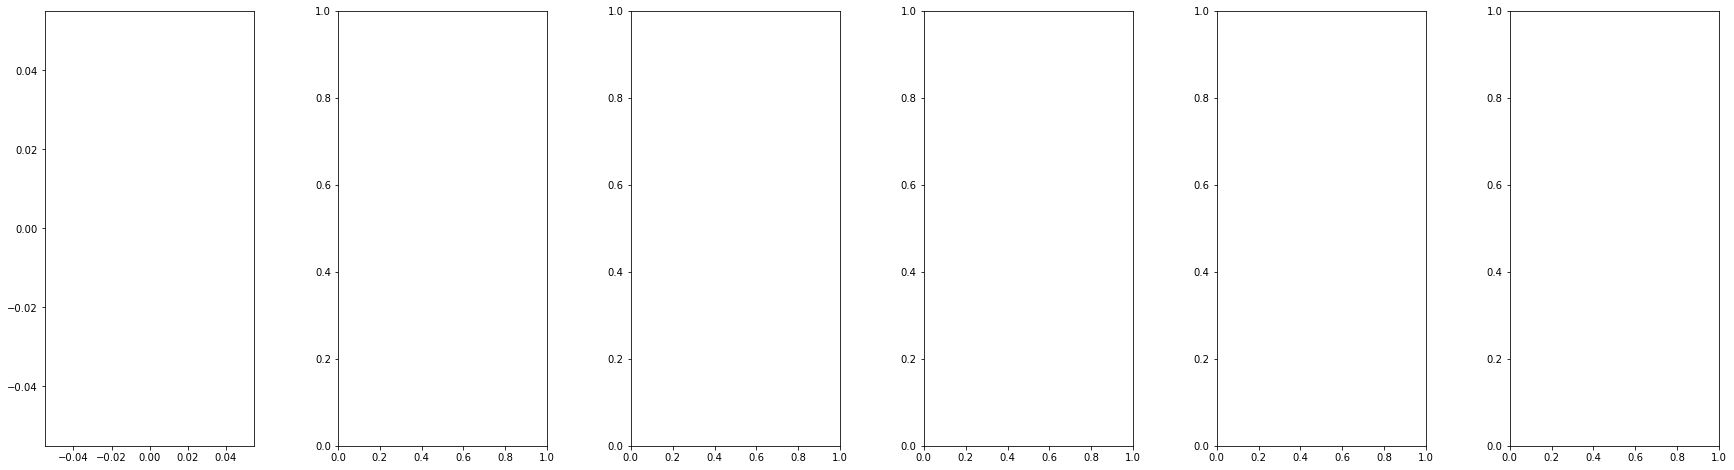

In [14]:
fig, ax = plt.subplots(1,6,figsize=(30,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)

# FIRST PLOT, Approach lines

random_line, = ax[0].plot([], [], color='green', label='Random')
mei_line, = ax[0].plot([], [], color='blue', label='MEI')
mli_line, = ax[0].plot([], [], color='red', label='MLI')
mu_line, = ax[0].plot([], [], color='purple', label='MU')
ucb_line, = ax[0].plot([], [], color='orange', label='UCB')
max_line, = ax[0].plot(range(n_steps), [max(y) for m in range(n_steps)], '--', color='black', label='Max Value')

random_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='green')
mei_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='blue')
mli_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='red')
mu_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='purple')
ucb_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='orange')

ax[0].legend(loc=4, prop={'size': 12})
ax[0].grid()
ax[0].set_title("Number of Experiments", fontsize=24)
ax[0].set_xlabel("Number of Experiments", fontsize=16)
ax[0].set_ylabel("Max"+ property_interest, fontsize=16)
mli_line.axes.axis([0, n_steps-1, 0, 1.1*max(y)])
mli_line.axes.get_yaxis().set_tick_params(labelsize=14)


# SECOND PLOT, Random Prediction

all_values_samples = ax[1].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

random_reallabel = [y[index] for index in random_train_inds]

random_initial_set = ax[1].plot(random_train_inds[:entry_number_init], random_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')

random_sample_real, = ax[1].plot([], [], color='green', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
random_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
random_sample_real.axes.get_xaxis().set_ticks([])
random_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)

ax[1].legend(bbox_to_anchor=(0.8, 0.1), prop={'size': 12})
ax[1].grid()
ax[1].set_title("Random", fontsize=24)
ax[1].set_xlabel("Test Candidates", fontsize=16)
ax[1].set_ylabel(property_interest, fontsize=16)

#THIRD PLOT, MEI Prediction

all_values_samples = ax[2].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mei_reallabel = [y[index] for index in mei_train_inds]

mei_initial_set = ax[2].plot(mei_train_inds[:entry_number_init], mei_reallabel[:entry_number_init], color='black', marker='o',linestyle= 'None',   markersize=10, label = 'Initial Set')

mei_sample_real, = ax[2].plot([], [], color='blue', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
mei_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
mei_sample_real.axes.get_xaxis().set_ticks([])
mei_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[2].legend(bbox_to_anchor=(0.8, 0.1), prop={'size': 12})
ax[2].grid()
ax[2].set_title("MEI", fontsize=24)
ax[2].set_xlabel("Test Candidates", fontsize=16)
ax[2].set_ylabel(property_interest, fontsize=16)

# 4th PLOT, MLI Prediction

all_values_samples = ax[3].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mli_reallabel = [y[index] for index in mli_train_inds]

mli_initial_set = ax[3].plot(mli_train_inds[:entry_number_init], mli_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')
mli_sample_real, = ax[3].plot([], [], color='red', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
mli_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
mli_sample_real.axes.get_xaxis().set_ticks([])
mli_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[3].legend(bbox_to_anchor=(0.8, 0.1), prop={'size': 12})
ax[3].grid()
ax[3].set_title("MLI", fontsize=24)
ax[3].set_xlabel("Test Candidates", fontsize=16)
ax[3].set_ylabel(property_interest, fontsize=16)


# 5th plot, MU Prediction

all_values_samples = ax[4].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mu_reallabel = [y[index] for index in mu_train_inds]

mu_initial_set = ax[4].plot(mu_train_inds[:entry_number_init], mu_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')
mu_sample_real, = ax[4].plot([], [], color='purple', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
mu_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
mu_sample_real.axes.get_xaxis().set_ticks([])
mu_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[4].legend(bbox_to_anchor=(0.8, 0.1), prop={'size': 12})
ax[4].grid()
ax[4].set_title("MU", fontsize=24)
ax[4].set_xlabel("Test Candidates", fontsize=16)
ax[4].set_ylabel(property_interest, fontsize=16)

# 6th plot, UCB Prediction

all_values_samples = ax[5].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

ucb_reallabel = [y[index] for index in ucb_train_inds]

ucb_initial_set = ax[5].plot(ucb_train_inds[:entry_number_init], ucb_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')
ucb_sample_real, = ax[5].plot([], [], color='orange', marker='o', linestyle= 'None',  markersize=10, label = 'Tests')
ucb_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
ucb_sample_real.axes.get_xaxis().set_ticks([])
ucb_sample_real.axes.get_yaxis().set_tick_params(labelsize=14)


ax[5].legend(bbox_to_anchor=(0.8, 0.1), prop={'size': 12})
ax[5].grid()
ax[5].set_title("UCB", fontsize=24)
ax[5].set_xlabel("Test Candidates", fontsize=16)
ax[5].set_ylabel(property_interest, fontsize=16)

#################################################

def update(num):
    
    if num > 0:
        
        random_graph = [max(y[list(t)]) for t in random_train[:num]]
        if max(y) in random_graph:
            chk_index = [i for i, j in enumerate(random_graph) if j == max(y)][0]
            random_line.set_data(np.arange(len(random_train))[:chk_index+1], [max(y[list(t)]) for t in random_train[:chk_index+1]])
            random_chk.set_data(chk_index, max(random_graph))
        else:
            random_line.set_data(np.arange(len(random_train))[:num], random_graph)
            random_sample_real.set_data(random_train_inds[entry_number_init:entry_number_init+num], random_reallabel[entry_number_init:entry_number_init+num])
        
        mei_graph = [max(y[list(t)]) for t in mei_train[:num]]
        if max(y) in mei_graph:
            chk_index = [i for i, j in enumerate(mei_graph) if j == max(y)][0]
            mei_line.set_data(np.arange(len(mei_train))[:chk_index+1], [max(y[list(t)]) for t in mei_train[:chk_index+1]])
            mei_chk.set_data(chk_index, max(mei_graph))
        else:
            mei_line.set_data(np.arange(len(mei_train))[:num], mei_graph)
            mei_sample_real.set_data(mei_train_inds[entry_number_init:entry_number_init+num], mei_reallabel[entry_number_init:entry_number_init+num])
        
        mli_graph = [max(y[list(t)]) for t in mli_train[:num]]
        if max(y) in mli_graph:
            chk_index = [i for i, j in enumerate(mli_graph) if j == max(y)][0]
            mli_line.set_data(np.arange(len(mli_train))[:chk_index+1], [max(y[list(t)]) for t in mli_train[:chk_index+1]])
            mli_chk.set_data(chk_index, max(mli_graph))
        else:
            mli_line.set_data(np.arange(len(mli_train))[:num], mli_graph)
            mli_sample_real.set_data(mli_train_inds[entry_number_init:entry_number_init+num], mli_reallabel[entry_number_init:entry_number_init+num])          
            
        mu_graph = [max(y[list(t)]) for t in mu_train[:num]]
        if max(y) in mu_graph:
            chk_index = [i for i, j in enumerate(mu_graph) if j == max(y)][0]
            mu_line.set_data(np.arange(len(mu_train))[:chk_index+1], [max(y[list(t)]) for t in mu_train[:chk_index+1]])
            mu_chk.set_data(chk_index, max(mu_graph))
        else:
            mu_line.set_data(np.arange(len(mu_train))[:num], mu_graph)
            mu_sample_real.set_data(mu_train_inds[entry_number_init:entry_number_init+num], mu_reallabel[entry_number_init:entry_number_init+num])   

            
        ucb_graph = [max(y[list(t)]) for t in ucb_train[:num]]
        if max(y) in ucb_graph:
            chk_index = [i for i, j in enumerate(ucb_graph) if j == max(y)][0]
            ucb_line.set_data(np.arange(len(ucb_train))[:chk_index+1], [max(y[list(t)]) for t in ucb_train[:chk_index+1]])
            ucb_chk.set_data(chk_index, max(ucb_graph))
        else:
            ucb_line.set_data(np.arange(len(ucb_train))[:num], ucb_graph)
            ucb_sample_real.set_data(ucb_train_inds[entry_number_init:entry_number_init+num], ucb_reallabel[entry_number_init:entry_number_init+num])
            
        return random_line, mei_line, mli_line, mu_line, ucb_line, random_sample_real, mei_sample_real,mli_sample_real, mu_sample_real, ucb_sample_real, mli_chk, mei_chk, random_chk, mu_chk, ucb_chk

anim = animation.FuncAnimation(fig, update, frames=len(random_train), interval=600, blit=False, repeat = False)


plt.close(fig)

HTML(anim.to_html5_video())

NameError: name 'n_steps' is not defined

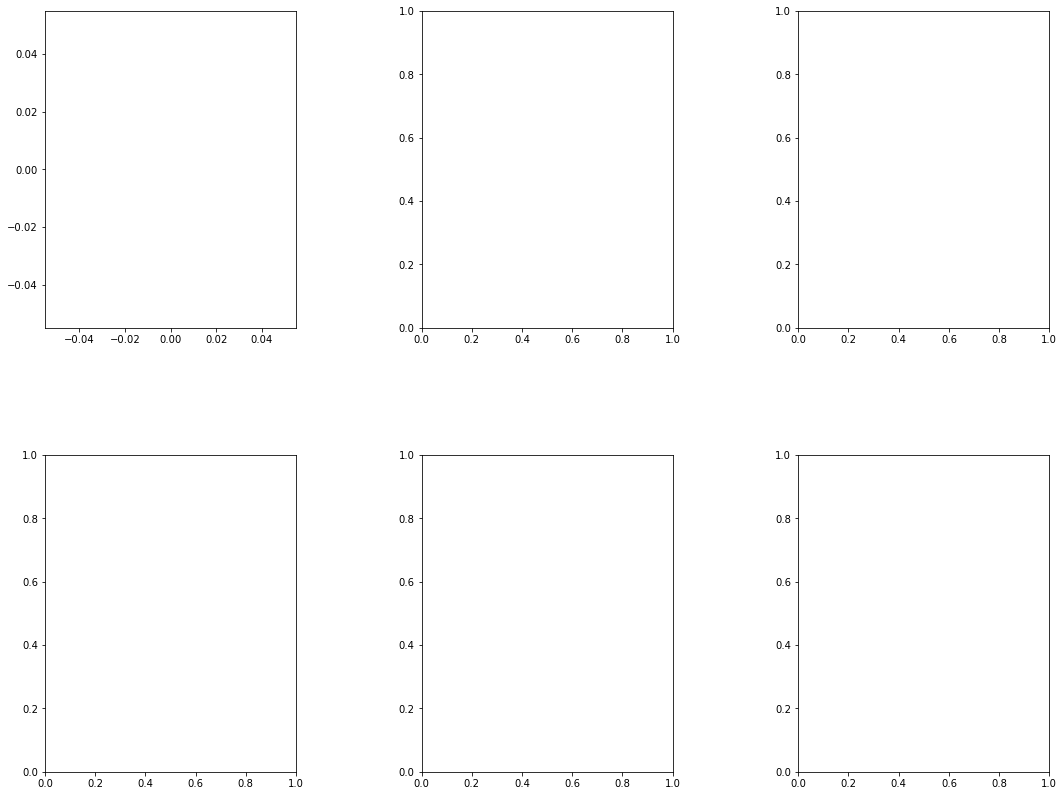

In [16]:
fig, ax = plt.subplots(2,3,figsize=(18,14))
ax = ax.flatten()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)

# FIRST PLOT, Approach lines

random_line, = ax[0].plot([], [], color='green', label='Random')
mei_line, = ax[0].plot([], [], color='blue', label='MEI')
mli_line, = ax[0].plot([], [], color='red', label='MLI')
mu_line, = ax[0].plot([], [], color='purple', label='MU')
ucb_line, = ax[0].plot([], [], color='orange', label='UCB')
max_line, = ax[0].plot(range(n_steps), [max(y) for m in range(n_steps)], '--', color='black', label='Maximum Value')

random_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='green')
mei_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='blue')
mli_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='red')
mu_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='purple')
ucb_chk, = ax[0].plot([], [], markersize=10, marker='*', linestyle='None', color='orange')

# ax0leg = ax[0].legend(loc=4, prop={'size': 12})
# ax0leg.get_frame().set_edgecolor('k')


ax[0].grid()
ax[0].set_xlabel("Number of Experiments", fontsize=24)
ax[0].set_ylabel("Maximum "+ property_interest, fontsize=24)
mli_line.axes.axis([0, n_steps-1, 0, 1.1*max(y)])

mli_line.axes.get_yaxis().set_tick_params(labelsize=20)
mli_line.axes.get_xaxis().set_tick_params(labelsize=20)


mei_line.axes.get_yaxis().set_tick_params(labelsize=20)
mu_line.axes.get_yaxis().set_tick_params(labelsize=20)
random_line.axes.get_yaxis().set_tick_params(labelsize=20)
ucb_line.axes.get_yaxis().set_tick_params(labelsize=20)

# SECOND PLOT, Random Prediction

all_values_samples = ax[5].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

random_reallabel = [y[index] for index in random_train_inds]

random_initial_set = ax[5].plot(random_train_inds[:entry_number_init], random_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')


# ax5leg = ax[5].legend(prop={'size': 12})
# ax5leg.get_frame().set_edgecolor('k')

ax[5].grid()
ax[5].set_title("Random", fontsize=26)
ax[5].set_xlabel("Test Candidates", fontsize=24)
ax[5].set_ylabel(property_interest, fontsize=24)


#THIRD PLOT, MEI Prediction

all_values_samples = ax[1].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mei_reallabel = [y[index] for index in mei_train_inds]

mei_initial_set = ax[1].plot(mei_train_inds[:entry_number_init], mei_reallabel[:entry_number_init], color='black', marker='o',linestyle= 'None',   markersize=10, label = 'Initial Set')

# ax1leg = ax[1].legend(prop={'size': 12})
# ax1leg.get_frame().set_edgecolor('k')

ax[1].grid()
ax[1].set_title("Maximum Expected \n Improvement (MEI)", fontsize=26)
ax[1].set_xlabel("Test Candidates", fontsize=24)
ax[1].set_ylabel(property_interest, fontsize=24)

# 4th PLOT, MLI Prediction

all_values_samples = ax[3].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mli_reallabel = [y[index] for index in mli_train_inds]

mli_initial_set = ax[3].plot(mli_train_inds[:entry_number_init], mli_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')

# ax3leg = ax[3].legend(prop={'size': 12})
# ax3leg.get_frame().set_edgecolor('k')

ax[3].grid()
ax[3].set_title("Maximum Likelihood \n of Improvement (MLI)", fontsize=26)
ax[3].set_xlabel("Test Candidates", fontsize=24)
ax[3].set_ylabel(property_interest, fontsize=24)


# 5th plot, MU Prediction

all_values_samples = ax[4].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

mu_reallabel = [y[index] for index in mu_train_inds]

mu_initial_set = ax[4].plot(mu_train_inds[:entry_number_init], mu_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')



# ax4leg = ax[4].legend(prop={'size': 12})
# ax4leg.get_frame().set_edgecolor('k')

ax[4].grid()
ax[4].set_title("Maximum \n Uncertainty (MU)", fontsize=26)
ax[4].set_xlabel("Test Candidates", fontsize=24)
ax[4].set_ylabel(property_interest, fontsize=24)

# 6th plot, UCB Prediction

all_values_samples = ax[2].plot(list(all_inds), y, marker='o', alpha=0.2, color='gray', linestyle='None', markersize=10, label='Values')

ucb_reallabel = [y[index] for index in ucb_train_inds]

ucb_initial_set = ax[2].plot(ucb_train_inds[:entry_number_init], ucb_reallabel[:entry_number_init], color='black', marker='o', linestyle= 'None',  markersize=10, label = 'Initial Set')


# ax2leg = ax[2].legend(prop={'size': 12})
# ax2leg.get_frame().set_edgecolor('k')

ax[2].grid()
ax[2].set_title("Upper Confidence \n Bound (UCB)", fontsize=26)
ax[2].set_xlabel("Test Candidates", fontsize=24)
ax[2].set_ylabel(property_interest, fontsize=24)

#################################################

num=90


import matplotlib.pylab as pl

if num > 0:

    random_graph = [max(y[list(t)]) for t in random_train[:num]]
    chk_index = [i for i, j in enumerate(random_graph) if j == max(y)][0]
    random_line.set_data(np.arange(len(random_train))[:chk_index+1], [max(y[list(t)]) for t in random_train[:chk_index+1]])
    random_chk.set_data(chk_index, max(random_graph))
    
    a = list(enumerate(random_train_inds[entry_number_init:entry_number_init+chk_index]))
    a = [_[0] for _ in a]
    
    n = len(a)
    colors = np.array(pl.cm.Greens(np.linspace(0,1,n)))
 
    random_sample_real = ax[5].scatter(random_train_inds[entry_number_init:entry_number_init+chk_index], random_reallabel[entry_number_init:entry_number_init+chk_index], c=colors, marker='o', s=100,linestyle= 'None', label = 'Tests')
    random_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
    random_sample_real.axes.get_xaxis().set_ticks([])
    random_sample_real.axes.get_yaxis().set_tick_params(labelsize=20)
    
    
    mei_graph = [max(y[list(t)]) for t in mei_train[:num]]
    chk_index = [i for i, j in enumerate(mei_graph) if j == max(y)][0]
    mei_line.set_data(np.arange(len(mei_train))[:chk_index+1], [max(y[list(t)]) for t in mei_train[:chk_index+1]])
    mei_chk.set_data(chk_index, max(mei_graph))
    
    a = list(enumerate(mei_train_inds[entry_number_init:entry_number_init+chk_index]))
    a = [_[0] for _ in a]
    
    n = len(a)
    colors = np.array(pl.cm.Blues(np.linspace(0,1,n)))    
    
    mei_sample_real = ax[1].scatter(mei_train_inds[entry_number_init:entry_number_init+chk_index], mei_reallabel[entry_number_init:entry_number_init+chk_index], c=colors, marker='o', s=100,linestyle= 'None', label = 'Tests')
    mei_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
    mei_sample_real.axes.get_xaxis().set_ticks([])
    mei_sample_real.axes.get_yaxis().set_tick_params(labelsize=20)
    
    

    mli_graph = [max(y[list(t)]) for t in mli_train[:num]]
    chk_index = [i for i, j in enumerate(mli_graph) if j == max(y)][0]
    mli_line.set_data(np.arange(len(mli_train))[:chk_index+1], [max(y[list(t)]) for t in mli_train[:chk_index+1]])
    mli_chk.set_data(chk_index, max(mli_graph))

    
    a = list(enumerate(mli_train_inds[entry_number_init:entry_number_init+chk_index]))
    a = [_[0] for _ in a]
    
    n = len(a)
    colors = np.array(pl.cm.Reds(np.linspace(0,1,n)))    
    
    mli_sample_real = ax[3].scatter(mli_train_inds[entry_number_init:entry_number_init+chk_index], mli_reallabel[entry_number_init:entry_number_init+chk_index], c=colors, marker='o', s=100,linestyle= 'None', label = 'Tests') 
    mli_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
    mli_sample_real.axes.get_xaxis().set_ticks([])
    mli_sample_real.axes.get_yaxis().set_tick_params(labelsize=20)    
    

    mu_graph = [max(y[list(t)]) for t in mu_train[:num]]
    chk_index = [i for i, j in enumerate(mu_graph) if j == max(y)][0]
    mu_line.set_data(np.arange(len(mu_train))[:chk_index+1], [max(y[list(t)]) for t in mu_train[:chk_index+1]])
    mu_chk.set_data(chk_index, max(mu_graph))
    
    a = list(enumerate(mu_train_inds[entry_number_init:entry_number_init+chk_index]))
    a = [_[0] for _ in a]
    
    n = len(a)
    colors = np.array(pl.cm.Purples(np.linspace(0,1,n)))     
    
    mu_sample_real = ax[4].scatter(mu_train_inds[entry_number_init:entry_number_init+chk_index], mu_reallabel[entry_number_init:entry_number_init+chk_index], c=colors, marker='o', s=100,linestyle= 'None', label = 'Tests') 
    mu_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
    mu_sample_real.axes.get_xaxis().set_ticks([])
    mu_sample_real.axes.get_yaxis().set_tick_params(labelsize=20)    
    
    
    ucb_graph = [max(y[list(t)]) for t in ucb_train[:num]]
    chk_index = [i for i, j in enumerate(ucb_graph) if j == max(y)][0]
    ucb_line.set_data(np.arange(len(ucb_train))[:chk_index+1], [max(y[list(t)]) for t in ucb_train[:chk_index+1]])
    ucb_chk.set_data(chk_index, max(ucb_graph))
    
    
    a = list(enumerate(ucb_train_inds[entry_number_init:entry_number_init+chk_index]))
    a = [_[0] for _ in a]
    
    n = len(a)
    colors = np.array(pl.cm.YlOrBr(np.linspace(0,1,n)))     
    
    ucb_sample_real = ax[2].scatter(ucb_train_inds[entry_number_init:entry_number_init+chk_index], ucb_reallabel[entry_number_init:entry_number_init+chk_index], c=colors, marker='o', s=100,linestyle= 'None', label = 'Tests') 
    ucb_sample_real.axes.axis([0, len(y), 0, 1.1*max(y)])
    ucb_sample_real.axes.get_xaxis().set_ticks([])
    ucb_sample_real.axes.get_yaxis().set_tick_params(labelsize=20)    

fig.show()

In [ ]:
mol_id = ['gdb_43226', 'gdb_18950', 'gdb_65057', 'gdb_27393']
print(mol_id)

In [ ]:
from pymatgen.db import QueryEngine
qe = QueryEngine()
#entries = qe.get_entries({})

qe = ["alpha", "homo","lumo", "cv","A"]

sample = ['gdb_43226', 'gdb_18950', 'gdb_65057']

for item in sample:
    mol_id_object = pymat.mol_id(item)
    print(item, mol_id_object.homo) # You can change "youngs_modulus" to any of the properties in the querable_pymatgen list
   

In [ ]:
gdb_43226_data = {} # Initializing a dictionary

# Each of the following lines is making a single entry

gdb_43226_data["alpha"] = mendel.mol_id("gdb_43226").alpha 
gdb_43226_data["homo"] = pymat.mol_id("gdb_43226").homo
gdb_43226_data["lumo"] = pymat.mol_id("gdb_43226").lumo
gdb_43226_data["cv"] = mendel.mol_id("gdb_43226").cv

#Print the entire entry for Fe
print(gdb_43226_data)

#Print a specific attribute:
print(gdb_43226_data["cv"])

# This line is to delete an entry
    # del Fe_data["atomic_number"]

In [ ]:
sample = mol_id.copy()

cv = [] # In this list we will store the Coefficients of Thermal Expansion
alpha = [] # In this list we will store the Young's Moduli
homo = [] # In this list we will store the Melting Temperatures

for item in sample:
    cv.append(pymat.mol_id(item).cv)
    alpha.append(pymat.mol_id(item).alpha)
    homo.append(pymat.mol_id(item).homo)

# You can visualize the lists by uncommenting these print statements
print(cv)
print(alpha)
print(homo)

# We will use the following arrays to group elements by their crystal structure at RT, all elements that are gases and liquids at RT have been removed

#fcc_elements = ["Ag", "Al", "Au", "Cu", "Ir", "Ni", "Pb", "Pd", "Pt", "Rh", "Sr", "Th", "Yb"]

#all_values = [] # Values for Attributes

#for item in fcc_elements:
#    element_values = []

#    element_object = pymat.Element(item)    
#    for i in querable_pymatgen:
#        element_values.append(getattr(element_object,i))
        
#    all_values.append(element_values) # All lists are appended to another list, creating a list of lists
    
# Pandas Dataframe
#df = pd.DataFrame(all_values, columns=querable_pymatgen)
#display(df)

In [ ]:
dataset.index = mol_id
display(dataset)

In [ ]:
dataset_big_atoms = dataset[dataset.r2.ge(150)]
display(dataset_big_atoms)
dataset_poisson = dataset[dataset.homo.eq(0.26)]
display(dataset_poisson)
dataset_condition = dataset[(dataset['homo'] < 0.26) & (dataset["lumo"] > 0.25)]
display(dataset_condition)

In [ ]:
import numpy as np
print(np.__version__)

!pip install -U numpy==1.19.5

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
%load_ext tensorboard
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
import tensorboard
tensorboard.__version__
!rm -rf ./logs/ 

In [ ]:
from matminer.datasets import load_dataset

df = load_dataset("qm9.csv")
#df = load_dataset("jarvis_dft_3d")
#from matminer.featurizer.conversions import ASEAtomstoStructure
#aa2s = ASEAtomstoStructure()
#df = aa2s.featurize_dataframe(df, "ase atoms", ignore_errors=True)

In [ ]:
from pymatgen.db import QueryEngine
qe = QueryEngine()
entries = qe.get_entries({})
rester.query('',['smiles','alpha','gap'])

In [ ]:
from pymatgen.db import QueryEngine
qe = QueryEngine()
qe 
#Print the task id and formula of all entries in the database.
for r in qe.query(properties=["smiles", "alpha"]):
    print "{alpha} - {smiles}".format(**r)

# Get a pymatgen Structure from the task_id.
>>> structure = qe.get_structure_from_id(12)

# Get pymatgen ComputedEntries using a criteria.
>>> entries = qe.get_entries({})

rester.query('',['smiles','alpha','gap'])



In [ ]:
dataset_1 = dataset.rename(columns={"mol_id": "Mol_ID", "smiles": "SMILES","A":"A","B":"B","C":"C","mu":"Mu","alpha":"Alpha","homo":"HOMO", "lumo":"LUMO","gap":"E. Gap","r2":"R2",
                     "zpve":"ZPVE","u0":"U0","u298":"U298","h298":"H298","g298":"G298","cv":"CV","u0_atom":"U0_atom","u298_atom":"U298_atom", "h298_atom":"H298_atom", "g298_atom":"G298_atom"})
display(dataset_1)
# "alpha" - Isotropic polarizability (unit: Bohr^3) [Bohr$^3$]
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)


In [ ]:
dataset = rester.query({"elements": "O", "nelements": {"$gte": 3}},
                    ["task_id","mol_id","smiles","A","B","C","mu","alpha","lumo","gap","r2",
                     "zpve","u0","u298","h298","g298","cv","u0_atom","u298_atom", "h298_atom", "g298_atom"])

In [ ]:
print('Number of oxide structures available on the MP database: %s' % len(data))
print('Example output: %s' % data[0])

In [ ]:
df_1 = pd.DataFrame.from_dict(dataset)
display(df_1)

In [ ]:
energy_cutoff_value = 10 #energy above convex hull cutoff [meV]
df_1 = df_1[df_1['Alpha'] <= (energy_cutoff_value/1)]  

In [ ]:
display(df_1)

In [ ]:
print('Number of SMILES available on the database: %s' % len(dataset))
print('Number of SMILES below %.1f meV: %s' %(energy_cutoff_value, len(df_1)))
display(df_1)

In [ ]:
#Filtering data for U0_atom
df_1 = df_1.dropna(subset=['U0_atom'])
print('Number of SMILES available on the database: %s' % len(dataset))
print('Number of SMILES below %.1f meV: %s' %(energy_cutoff_value, len(df_1)))
display(df_1)

In [ ]:
data = get_dataframe(print_properties_options=True)
display(data.head(n=10))

In [ ]:
client = (dataset)
temp_list = []
query_list_all = ['gdb_51741','gdb_18950','gdb_27393','gdb_43226']
for mol_id in query_list_all:
    res = client.query(mol_id +' alpha')
    print(mol_id, next(res.results).text)
    alph = float(next(res.results).text[:-21])
    temp_list.append(alph)

import matplotlib.pyplot as plt

plt.barh(query_list_all,temp_list,align='center',label='Query')
for i,v in enumerate(temp_list):
    plt.text(v + 3, i , int(v), color='black',fontsize=14)
plt.xlabel('alpha [Bohr$^{3}$]',fontsize=16)
plt.ylabel('mol_id',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid()
plt.show()

    

In [ ]:
#sns.distplot(dataset["measured log solubility in mols per litre"])
df = pd.DataFrame(dataset)
display(df)
df_condition = df[(df['alpha'] < 10) & (df["gap"] > 0.25)]
# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)
display(df_condition)
df_homo = df[df.homo.eq(0.26)]
display(df_homo)

In [ ]:
data_alpha = []
data_homo = []
data_lumo = []
for item in df:
    data_alpha.append(df.alpha(item).alpha)
    data_homo.append(df.data_homo(item).homo)
    data_lumo.append(df.data_lumo(item).lumo)
    #data_youngs_modulus.append(pymat.Element(item).youngs_modulus)
    #data_CTE.append(pymat.Element(item).coefficient_of_linear_thermal_expansion)
print(data_alpha)
print(len(data_alpha),len(data_homo))
data_alpha[2]

In [ ]:
df = pd.DataFrame(dataset)
display(df)

In [ ]:
index_Dummy = df.index[df['mol_id'] == 'gdb_32027']
df.iloc[index_Dummy, df.columns.get_loc('A')] = 102 # GPa 

# The labels (values for Young's modulus) are stored separately for clarity (We drop the column later)

df.to_csv(os.path.expanduser('./update_data.csv'), index=False, compression=None) # this line saves the data we collected into a .csv file into your home directory

all_labels = df['A'].tolist()
df = df.drop(['A'], axis=1)

#We will rewrite the arrays with the patches we made on the dataset by turning the dataframe back into a list of lists

all_values = [list(df.iloc[x]) for x in range(len(all_values))]

# SETS

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float) 
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = float)
print("Shape of Labels:", all_labels.shape)

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)

#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
order = np.arange(49)
all_values = all_values[order]
all_labels = all_labels[order]


In [ ]:
data = dataset(criteria={'dataset.index': '43567'}, print_properties_options=True)
#display(data.head())
display(data)

In [ ]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import iplot
#plotly.offline.init_notebook_mode(connected=True)
#plotly.offline.init_notebook_mode(connected=True)

# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)

fig = px.bar(dataset.head(20), x='smiles', y='mol_id')
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()
data = fig
layout = go.Layout(title= "Gap between HOMO and LUMO vs. Dipole moment", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=12),
                   xaxis= dict(title= '$Gap \: between \: HOMO \: and \: LUMO \: [Hartree]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Dipole \: moment \: [D]$',zeroline= False, gridwidth= 2),
                   height = 900,
                   width = 900,
     showlegend= True                
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, "./fig_smiles.png", scale=2, width=600, height=350)
#pio.write_image(fig, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles.png", scale=2, width=600, height=350)

#fig.write_image("gdrive/MyDrive/Colab Notebooks/data/fig_smiles.png",dpi=600)
#ax=px.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_smiles.png', dpi=600, facecolor='w', edgecolor='w',orientation='landscape', papertype='a4', format=None, transparent=False, bbox_inches=None, pad_inches=None, frameon=None, metadata=None)
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=600, height=350, scale=1)
Image(img_bytes)

In [ ]:
# Here we are creating a function that takes a value X (Which will be the Symbol of the Element) 
# and returns a color depending on what its crystal structure is in our arrays from the beginning.
# That is because we want to color data according to the crystal structure; therefore, we will have to pass this info to the plot

def SetColor_CrystalStr(x):
    if x in df[df.alpha.ge(25)]:
        return "red" #This are standard CSS colors, but you can also use Hexadecimal Colors (#009900) or RGB "rgb(0, 128, 0)"
    elif x in df[df.alpha.le(20)]:
        return "blue"
    elif x in df[df.alpha.eq(22)]:
        return "yellow"
    else:
        return "lightgray"
    
# We will then create a list that passes all element symbols through this function. For that we will use the python function "map"    
# Map takes each element on a list and evaluates it in a function.

colors = list(map(SetColor_CrystalStr, df))

# You can see this list of generated colors looks like by uncommenting this line

print(colors)

In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

#plotly.offline.init_notebook_mode(connected=True)

# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)

df = pd.DataFrame(dataset.head(200))

def SetColor_CrystalStr(x):
    if x in df[df['alpha'] == 30]:
        return "red" #This are standard CSS colors, but you can also use Hexadecimal Colors (#009900) or RGB "rgb(0, 128, 0)"
    elif x in df[df.cv.eq(20)]:
        return "blue"
    elif x in df[(df['alpha'] < 20) & (df["cv"] > 15)]:
        return "yellow"
    else:
        return "lightgray"
colors = list(map(SetColor_CrystalStr, df))
#print(colors)

#Layout design. Can change title, font, x/y-axis etc. Commented out pieces are height and width. 
#For plot in browser I prefer long horizontal plots. For presentations square images may be preferred. 
#Image can be directly saved by hovering over image and clicking camera icon. 
layout_cv_alpha = go.Layout(title= 'Heat capavity at 298.15K vs. Isotropic polarizability',
                   font = dict(family='Times New Roman',size=12),
                   xaxis= dict(title=go.layout.xaxis.Title(text='$Heat \: capavity \: (cv) \: at \: 298.15K \: [cal/(mol*K)]$', font=dict(size=24)),zeroline= False, gridwidth= 2, tickfont=dict(size=18)),
                   yaxis= dict(title=go.layout.yaxis.Title(text='Isotropic polarizability (alpha) [(Bohr<sup>3</sup>)]', font=dict(size=24)),zeroline= False, gridwidth= 2, tickfont=dict(size=18)),
                   height = 600, width = 600, hovermode= 'closest', showlegend=True, legend=dict(font=dict(size=24))                
)
#text='Isotropic polarizability (alpha) [(Bohr<sup>3</sup>)]'
#text="$Isotropic \: polarizability \: (alpha) \: [(Bohr^3)]$"
# Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
# Axis Titles. Removing the X-axis Mark. Adding a Grid
# Axis Titles. Removing the Y-axis Mark. Adding a Grid
# Adding a legend

#Scatter plot of collected data. Use df_oxide_all dataframe. df_oxide_all.Density will pull density column.
trace_cv_alpha = go.Scatter(x = df.cv, y = df.alpha, mode = 'markers',
                    marker=dict(size=12, line= dict(width=1), color=colors), text= sample, showlegend = True)

# Empty Traces for Legend
legend_plot_alpha = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='red'), name = 'alpha')
legend_plot_alpha1 = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='blue'), name = 'alpha1')
legend_plot_alpha2 = go.Scatter(x=[None], y=[None], mode='markers', marker=dict(size=14,  line= dict(width=1),color='yellow'), name = 'alpha2')

data_cv_alpha = [trace_cv_alpha,legend_plot_alpha,legend_plot_alpha1,legend_plot_alpha2]#,trace0,trace2] trace_homo_lumo
fig_cv_alpha = go.Figure(data_cv_alpha, layout_cv_alpha)
iplot(fig_cv_alpha)
pio.write_image(fig_cv_alpha, "./fig_smiles_trace_cv_alpha.png", scale=1, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace.png", scale=2, width=600, height=350)

In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

#plotly.offline.init_notebook_mode(connected=True)

from IPython.display import Image
img_bytes = fig_cv_alpha.to_image(format="png", width=600, height=350, scale=1)
Image(img_bytes)

layout_homo_lumo = go.Layout(title= "Highest occupied molecular orbital energy vs. Lowest unoccupied molecular orbital energy", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=12),
                   xaxis= dict(title= '$Lowest \: unoccupied \: molecular \: orbital \: energy \: (LUMO) \: [Hartree]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Highest \: occupied \: molecular \: orbital \: energy \: (HUMO) \: [Hartree]$',zeroline= False, gridwidth= 2),
                   height = 600,
                   width = 600,
     showlegend= True                
)
trace_homo_lumo = go.Scatter(x = df.loc[:,'homo'],
                        y = df.loc[:,'lumo'],
                        mode = 'markers', marker=dict(size=18, color='magenta'), text = 'homo lumo', name = 'homo lumo')
trace2 = go.Scatter(x = [0,600], y = [0,600], mode = 'lines', name = "Match") # This trace is the line X = Y which would indicate that the Prediction equals the real value

data_homo_lumo = [trace_homo_lumo,trace2]#,trace0,trace2] trace_homo_lumo
fig_homo_lumo = go.Figure(data_homo_lumo, layout=layout_homo_lumo)
iplot(fig_homo_lumo)
pio.write_image(fig_homo_lumo, "./fig_smiles_trace_homo_lumo.png", scale=1, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace.png", scale=2, width=600, height=350)

from IPython.display import Image
img_bytes = fig_homo_lumo.to_image(format="png", width=600, height=350, scale=1)
Image(img_bytes)

In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

df = pd.DataFrame(dataset.head(10))

layout_IPF_shear_modulus = go.Layout(title= "Homo vs. Lumo", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=18),
                   xaxis= dict(title= '$Highest \: occupied \: molecular \: orbital \: energy \: [Hartree]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Lowest \: unoccupied \: molecular \: orbital \: energy \: [Hartree]$',zeroline= False, gridwidth= 2),
                   height = 600,
                   width = 1200,
     showlegend= False              
)

#Scatter plot of collected data. Use df_oxide_all dataframe. df_oxide_all.Density will pull density column. Could change Density or IPF to Molar Volume or simply volume if you wanted.
trace_all_shear = go.Scatter(x = abs(df.homo), y = df.lumo, mode = 'markers', text = df,
                            marker=dict(size=12, color=(df['gap']),
                                colorbar = dict(title={ 'text': "gap", 
                                                     'font': {'family':'Georgia', 'size': 18}} , 
                                              tickfont={'family':'Georgia', 'size': 16 })))#, name = 'All Queries'))

data_IPF_shear = [trace_all_shear]#,trace0,trace2]
fig_IPF_shear = go.Figure(data_IPF_shear, layout=layout_IPF_shear_modulus)
iplot(fig_IPF_shear)
pio.write_image(fig_IPF, "./fig_smiles_trace_3variable.png", scale=2, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace_3variable.png", scale=2, width=600, height=350)

from IPython.display import Image
Image(img_bytes)
img_bytes = fig_IPF_shear.to_image(format="png", width=600, height=350, scale=2)

In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

df = pd.DataFrame(dataset.head(10))

layout_IPF_shear_modulus = go.Layout(title= "Mobility vs. Zero Point Vibrational Energy ", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=18),
                   xaxis= dict(title= '$Mobility \: \: [cm2/(V⋅s)]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Zero Point Vibrational Energy\: (ZPVE) [GPa]$',zeroline= False, gridwidth= 2),
                   height = 600,
                   width = 1200,
     showlegend= False              
)

#Scatter plot of collected data. Use df_oxide_all dataframe. df_oxide_all.Density will pull density column. Could change Density or IPF to Molar Volume or simply volume if you wanted.
trace_all_shear = go.Scatter(x = abs(df.homo), y = df.lumo, mode = 'markers', text = df,
                            marker=dict(size=12, color=(df['gap']),
                                colorbar = dict(title={ 'text': "gap", 
                                                     'font': {'family':'Georgia', 'size': 18}} , 
                                              tickfont={'family':'Georgia', 'size': 16 })))#, name = 'All Queries'))

data_IPF_shear = [trace_all_shear]#,trace0,trace2]
fig_IPF_shear = go.Figure(data_IPF_shear, layout=layout_IPF_shear_modulus)
iplot(fig_IPF_shear)
pio.write_image(fig_IPF, "./fig_smiles_trace_3variable.png", scale=2, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace_3variable.png", scale=2, width=600, height=350)

from IPython.display import Image
Image(img_bytes)
img_bytes = fig_IPF_shear.to_image(format="png", width=600, height=350, scale=2)

In [ ]:
import plotly.express as px
import plotly #This is the library import
import plotly.graph_objs as go # This is the graphical object (Think "plt" in Matplotlib if you have used that before)

from plotly.offline import iplot # These lines are necessary to run Plotly in Jupyter Notebooks, but not in a dedicated environment
plotly.offline.init_notebook_mode(connected=True)


# To create a plot, you need a layout and a trace

# The layout gives Plotly the instructions on the background grids, tiles in the plot, 
# axes names, axes ticks, legends, labels, colors on the figure and general formatting.



layout = go.Layout(title = "Mu vs Smile String", xaxis= dict(title= 'smiles'), yaxis= dict(title= 'mu'))



# The trace contains a type of plot (In this case, Scatter, but it can be "Bars, Lines, Pie Charts", etc.), 
# the data we want to visualize and the way ("Mode") we want to represent it.

df = px.data.iris()
trace = go.scatter(df, x=df.alpha, y =df.mu, mode = 'markers')

# To plot, we create a figure and implement our components in the following way:

data = [trace] # We could include more than just one trace here

fig= go.Figure(data, layout=layout)
iplot(fig)

In [ ]:
#sns.distplot(dataset["measured log solubility in mols per litre"])

#ax = sns.displot(dataset["mu"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_mu.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_mu.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["alpha"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_alpha.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_alpha.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["homo"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_homo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_homo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["lumo"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_lumo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_lumo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["gap"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_gap.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_gap.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)


#ax = sns.displot(dataset["zpve"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_zpve.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_zpve.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

ax = sns.distplot(dataset["r2"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
ax=plt.savefig('./fig_r2.png', dpi=600, facecolor='w', edgecolor='w',orientation='landscape', papertype='a4', format=None, transparent=False, bbox_inches=None, pad_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_r2.png', dpi=600, facecolor='w', edgecolor='w',orientation='landscape', papertype='a4', format=None, transparent=False, bbox_inches=None, pad_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["cv"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_cv.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_cv.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)


In [ ]:
smiles_lengths = map(len, dataset.smiles.values)
#sns.distplot(list(smiles_lengths), bins=20, kde=False)
ax = sns.distplot(list(smiles_lengths), bins=20, kde=True, kde_kws={"color": "k", "label": "KDE"})
ax=plt.savefig('./fig_smiles_lengths.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_smiles_lengths.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)
# ax=plt.savefig('../data/fig_smiles_lengths.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)


In [ ]:
smiles_lengths = map(len, dataset.smiles.values)
#sns.distplot(list(smiles_lengths), bins=20, kde=False)
sns.displot(list(smiles_lengths), bins=20, kde=False)

In [3]:
from typing import List, Optional
import numpy as np

def generate_charset(full_char_list:list) -> list:
    '''
    Assumes full_char_list is a list of characters (e.g., ['c', 'c', '1']).
    Returns a sorted list of unique characters, with index zero as a NULL character, and a PAD character.
    '''
    unique_chars = set(''.join(full_char_list))
    charset = ['NULL', 'PAD'] + sorted(unique_chars)
    return charset

def smiles_to_onehots(smiles_strings:list,
                     unique_charset:list,
                     max_smiles_chars:int) -> np.array:
    one_hots = []
    charset_length = len(unique_charset)

    for smiles_string in smiles_strings:
        one_hot_smiles = np.zeros(shape=(max_smiles_chars, charset_length))
        for i in range(max_smiles_chars):
            one_hot_col = [0]*charset_length
            ind = None # Which index will we flip to be "one-hot"?
            
            if i < len(smiles_string):
                try:
                    ind = unique_charset.index(smiles_string[i])
                    # one_hot_col[unique_charset.index(char)] = 1
                except ValueError:
                    ind = 0 # Treat as NULL if out-of-vocab  
                    # one_hot_col[0] = 1 # Treat as NULL if out-of-vocab   
            else:
                ind = 1 # Add PAD as needed
            
            one_hot_col[ind] = 1
            one_hot_smiles[i,:] = one_hot_col
            
        one_hots.append(one_hot_smiles)
    return np.array(one_hots)

In [4]:
charset = generate_charset(
    dataset["smiles"].values.ravel()
)
# get the number of unique characters
charset_length = len(charset)
# define max number of SMILES for model input vector
max_smiles_chars = 40
# dimension of input vector
input_dim = charset_length * max_smiles_chars
# get one-hot representation of the SMILES strings 
one_hots = smiles_to_onehots(dataset["smiles"].values, charset, max_smiles_chars)
# split input into train and test sets
X_train = one_hots[:-13385] #This takes the first 133885-13385=120500  entries to be the Training Set
X_test = one_hots[-13385:] # This takes the last 13385 entries to be the Testing Set

# split output to train and test sets
output = dataset["lumo"].values
#output = dataset["homo"].values
#output = dataset["cv"].values
#output = dataset["r2"].values

# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)
Y_train = output[:-13385] #This takes the first 133885-100=133785 entries to be the Training Set
Y_test = output[-13385:] # This takes the last 100 entries to be the Testing Set

# This Reshape function in the next two lines, turns each of the horizontal lists [ x, y, z] into a
# vertical NumPy array [[x]
#                       [y]
#                       [z]]
# This Step is required to work with the Sklearn Linear Model
#Y_train = np.array(melt_train).reshape(-1,1) 
#Y_test  = np.array(melt_test).reshape(-1,1)
print(len(X_train),len(X_test),len(Y_train),len(Y_test))
print(X_train[0]) # print a sample entry from the training set
print(X_test[0]) # print a sample entry from the training set
print(order)

120500 13385 120500 13385
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

NameError: name 'order' is not defined

In [ ]:
# This function defines a model, trains it, and uses it to predict
# It also outputs the linear model and information about its accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
# https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train = one_hots[:-100] #This takes the first 133885-13385=120500  entries to be the Training Set
X_test = one_hots[-100:] # This takes the last 13385 entries to be the Testing Set
# split output to train and test sets
output = dataset["lumo"].values
Y_train = output[:-100] #This takes the first 133885-100=133785 entries to be the Training Set
Y_test = output[-100:] # This takes the last 100 entries to be the Testing Set
print(len(X_train),len(X_test),len(Y_train),len(Y_test))
print(X_train[0]) # print a sample entry from the training set
print(X_test[0]) # print a sample entry from the training set
print(order)

x_train = np.array(X_train).reshape(-1,1)
x_test = np.array(X_test).reshape(-1,1)
y_train = np.array(Y_train).reshape(-1,1)
y_test = np.array(Y_test).reshape(-1,1)

def regression(x_train, x_test, y_train, y_test):
    
    # Define the model and train it
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    
    #Join train + test data 
    full_x = np.concatenate((x_train), axis=0)
    full_y = np.concatenate((y_train), axis=0)
    #full_x = np.concatenate((x_train, x_test), axis=0)
    #full_y = np.concatenate((y_train, y_test), axis=0)
    
    # Use the model to predict the entire set of data
    predictions = model.predict(full_x) # Make it for all values
    
    # Print model and mean squared error and variance score
    print("Linear Equation: %.4e X + (%.4e)"%(model.coef_, model.intercept_))
    print("Mean squared error: %.4e" % (mean_squared_error(full_y, predictions)))
    print('Variance score: %.4f' % r2_score(full_y, predictions))    
    
    return predictions

In [ ]:
import plotly #This is the library import
import plotly.graph_objs as go # This is the graphical object (Think "plt" in Matplotlib if you have used that before)
from plotly.offline import iplot # These lines are necessary to run Plotly in Jupyter Notebooks, but not in a dedicated environment

plotly.offline.init_notebook_mode(connected=True)

def plot(x_train, x_test, y_train, y_test, x_label, y_label, predictions):
    
    # The reshape functions in the next two lines, turns each of the
    # vertical NumPy array [[x]
    #                       [y]
    #                       [z]]
    # into python lists [ x, y, z]
    
    # This step is required to create plots with plotly like we did in the previous tutorial
    
    x_train = x_train.reshape(1,-1).tolist()[0]
    x_test = x_test.reshape(1,-1).tolist()[0]
    y_train = y_train.reshape(1,-1).tolist()[0]
    y_test = y_test.reshape(1,-1).tolist()[0]    
    predictions = predictions.reshape(1,-1).tolist()[0]
    full_x_list = x_train + x_test

    
    # Now we get back to what we know. Remember, to plot in Plotly, we need a layout and at least one trace
    
    layout0= go.Layout(hovermode= 'closest', width = 800, height=600, showlegend=True,  # Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
    xaxis= dict(title=go.layout.xaxis.Title(text=x_label, font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the X-axis Mark. Adding a Grid
    yaxis= dict(title=go.layout.yaxis.Title(text=y_label, font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the Y-axis Mark. Adding a Grid
    legend=dict(font=dict(size=24))) # Adding a legend
    

    training = go.Scatter(x = x_train, y = y_train, mode = 'markers', 
                          marker= dict(size= 10, color= 'green'), name= "Training Data") 
    # This trace contains the values for the data in the training set
    
    actual = go.Scatter(x = x_test, y = y_test, mode = 'markers', 
                        marker= dict(size= 10, color= 'red'), name= "Testing Data") 
    # This trace contains the values for the data in the testing set

    prediction = go.Scatter(x = full_x_list, y = predictions, mode = 'lines', 
                            line = dict(color = "blue", width = 1.5),name= "Model") 
    # This trace will be the line the model fitted the data to

    data = [training, actual, prediction]
    fig= go.Figure(data, layout=layout0)
    iplot(fig)

In [ ]:
predictions = regression(x_train, x_test, y_train, y_test) 
# This line calls the Regression model implemented in the function 

plot(x_train, x_test, y_train, y_test, "Melting Temperature (K)", "Young's Modulus (GPa)", predictions) 
# This line plots the results from that model

O=C1C2CCCC1C=C2
O=CC1C2C3CC2N13
CC1(CO1)C1(CO1)C#C
c1c([nH]c(nc1=O)N)O
O=COC1CCC11CN1
CC1C(C#C)C1(N)C#N
CCOC1(C)CCOC1
OCC1OC11CC2NC12
CC1C=C2CN3CC1C23
CC1=C2CCCC2CC1
c1cnc(cc1N)O
CCC#CCC
N=C1OCC11CN1C=O
CC1(COC1)C(C)(C)C
CN=COC1COC1
COC=NCC(=O)OC
CC(=N)N(C=O)C(=O)N
COCC(O)C(N)C#N
CC1C(C)C1CNC=O
NC1=C(F)N=NNC1=N
CCC1CC=CCCO1
CC1C2OC2C=C1C
CC12OCC3C1C1C2N31
CC1OCC11COCO1
C#CCC12CN(C1)C2


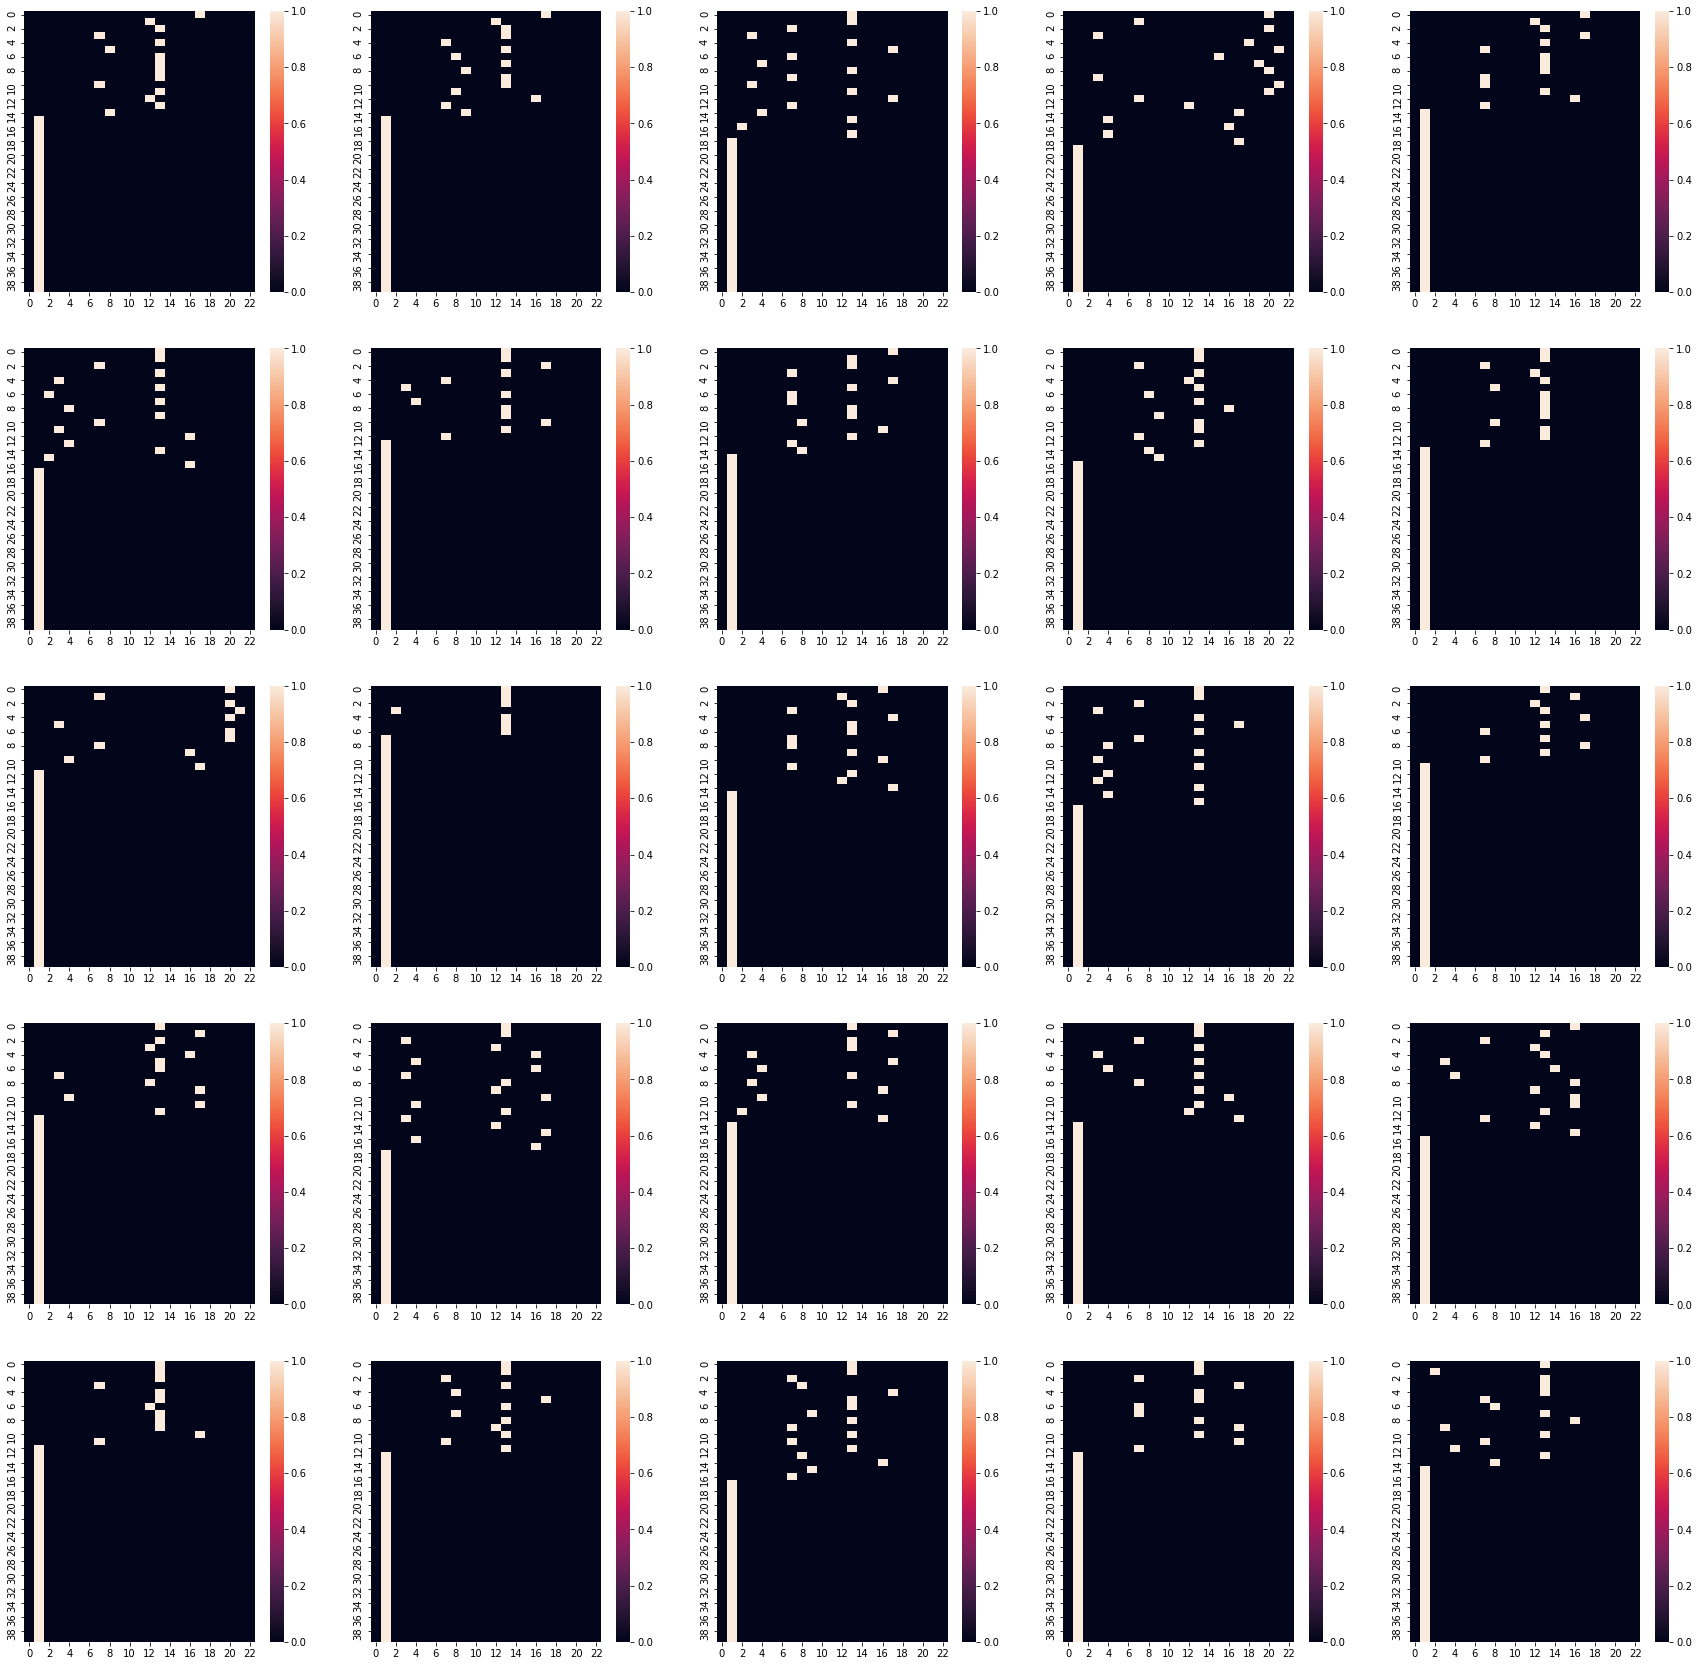

In [5]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(6*num_cols, 6*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    #plot_image(i, predictions, testLabels, testImages)
#plt.figure(figsize=(30,30))
#for i in range(25): #133785 
    #plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.xlabel('Character')
    #plt.ylabel('Position in SMILES String')
    sns.heatmap(X_train[i])
    #plt.imshow(X_train[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[int(trainLabels[i])])
    print(dataset.iloc[i]['smiles'])

#plt.imshow(X_train[index]) # By altering 'index' you will see another of the pictures imported
#plt.colorbar()
#plt.grid(False)
#print("Train Images Array shape:", trainImages.shape)
#print("Train Labels Array shape:", trainLabels.shape)
#print("Test Images Array shape:", testImages.shape)
#print("Test Labels Array shape:", testLabels.shape)

#index = 6986 #index runs from 0 to 138388
#sns.heatmap(X_train[index]) # This is a single training example -- note that it is a matrix, not a single vector!
#plt.xlabel('Character')
#plt.ylabel('Position in SMILES String')
#print(dataset.iloc[index]['smiles'])
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_smiles_character.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)
ax=plt.savefig('./fig_smiles_character.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)


Here, we will multi-hot encode the sentences. Multi-hot-encoding our lists means turning them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. This model will quickly overfit to the training set and can be used to demonstrate when overfitting occurs, and how to fight it.

The word indices are sorted by frequency, so it is expected that there are more 1-values near index zero, as we can see in the plot:

In [ ]:
import text_processing
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = text_processing.load_data(num_words=10000)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

print(train_data[0])
_ = plt.plot(train_data[0], marker='o', linestyle = 'None', markersize = 2)

# <ins>Supervised CNN model for predicting mobility</ins>

In this section, we will set up a convolutional neural network to predict mobility using one-hot SMILES as input. A convolutional neural network is a machine learning model that is commonly used to classify images.

### Define model structure

First, we will create the model structure, starting with the input layer. As described above, each training example is a 40x31 matrix, which is the shape we pass to the Input layer in Keras.

In [ ]:
# Define the input layer
# NOTE: We feed in a sequence here! We're inputting up to max_smiles_chars characters, 
# and each character is an array of length charset_length
smiles_input = Input(shape=(max_smiles_chars, charset_length), name="SMILES-Input")

Next we will define the convolution layers where each layer attempts to learn certain features of the images, such as edges and corners. The input to each layer (a matrix) is transformed via convolution operations, which are element by element multiplications of the input matrix and a filter matrix. The convolutional layer learns the filter matrix that will best identify unique features of the image. You can learn more about convolution operations and the math behind convolutional neural networks [here](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9).

In [ ]:
# Set parameters for convolutional layers 
num_conv_filters = 16
kernel_size = 3
#kernel_init = initializers.RandomNormal(seed=0)
#bias_init = initializers.Zeros()
init_weights = initializers.glorot_normal(seed=0)

# Define the convolutional layers
# Multiple convolutions in a row is a common architecture (but there are many "right" choices here)
conv_1_func = Conv1D(
    filters=num_conv_filters, # What is the "depth" of the convolution? How many times do you look at the same spot?
    kernel_size=kernel_size, # How "wide" of a spot does each filter look at?
    name="Convolution-1",
    activation="relu", # This is a common activation function: Rectified Linear Unit (ReLU)
    kernel_initializer=init_weights #This defines the initial values for the weights
)
conv_2_func = Conv1D(
    filters=num_conv_filters, 
    kernel_size=kernel_size, 
    name="Convolution-2",
    activation="relu",
    kernel_initializer=init_weights
)
conv_3_func = Conv1D(
    filters=num_conv_filters, 
    kernel_size=kernel_size, 
    name="Convolution-3",
    activation="relu",
    kernel_initializer=init_weights
)
conv_4_func = Conv1D(
    filters=num_conv_filters, 
    kernel_size=kernel_size,
    name="Convolution-4",
    activation="relu",
    kernel_initializer=init_weights
)

The four convolution layers defined above will attempt to learn features of the SMILES string (represented as a 40x31 matrix) that are relevant to predicting the mobility. To get a numerical prediction, we now flatten the output of the convolution and pass it to a set of regular `Dense` layers, the last layer predicting one value for the mobility.

In [ ]:
# Define layer to flatten convolutions
flatten_func = Flatten(name="Flattened-Convolutions")

# Define the activation function layer
hidden_size = 32
dense_1_func = Dense(hidden_size, activation="relu", name="Fully-Connected", kernel_initializer=init_weights)

# Define output layer -- it's only one dimension since it is regression
output_size = 1
output_mobility_func = Dense(output_size, activation="linear", name="Log-lumo", kernel_initializer=init_weights)

Now that we have defined all the layers, we will connect them together to make a graph:

In [ ]:
# connect the CNN graph together
conv_1_fwd = conv_1_func(smiles_input)
conv_2_fwd = conv_2_func(conv_1_fwd)
conv_3_fwd = conv_3_func(conv_2_fwd)
conv_4_fwd = conv_4_func(conv_3_fwd)
flattened_convs = flatten_func(conv_4_fwd)
dense_1_fwd = dense_1_func(flattened_convs)
output_mobility_fwd = output_mobility_func(flattened_convs)

### View model structure and metadata

Now the model is ready to train! But first we will define the model as `mobility_model` and compile it, then view some information on the model using the [keras2ascii](https://github.com/stared/keras-sequential-ascii) tool, which visually represents the layers in our model.

In [ ]:
# create model
mobility_model = Model(
            inputs=[smiles_input],
            outputs=[output_mobility_fwd]
)
mae_st = []
# compile model
#optimizer = optimizers.RMSprop(0.002) # Root Mean Squared Propagation
# This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy

# loss= mse, mae
# loss= categorical_crossentropy
#loss='sparse_categorical_crossentropy'
#loss='binary_crossentropy'
#metrics=['accuracy', 'binary_crossentropy']
#metrics=['accuracy']
mobility_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)
mobility_model.summary()

In [ ]:
#!pip install keras_sequential_ascii
from keras_sequential_ascii import keras2ascii
# view model as a graph
keras2ascii(mobility_model)

### Train CNN

Now we will train our CNN mobility model to the training data! During training, we will see metrics printed after each epoch such as test/train loss (both as Mean Squared Error (MSE) and Mean Absolute Error (MAE)).

In [ ]:
logdir="mobility_logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
mae_st = []
history = mobility_model.fit(
    X_train, # Inputs
    Y_train, # Outputs
    epochs=20, # How many times to pass over the data
    batch_size=64, # How many data rows to compute at once
    verbose=1,
    validation_data=(X_test, Y_test),
    callbacks=[tensorboard_callback] # You would usually use more splits of the data if you plan to tune hyperparams
)
print(mse)
print(mae)
mobility_model.save(os.path.expanduser('./cnn_model.h5'))

In [ ]:
weights = mobility_model.get_weights()
weights[3]

In [ ]:
#baseline_history= baseline_mobility_model.fit()
#smaller_history= smaller_mobility_model.fit()
#bigger_history= bigger_mobility_model.fit()

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '.', markersize=10, linestyle=':', label=name.title()+' Validation')
        plt.plot(history.epoch, history.history[key],"^", markersize=10, linestyle = '-',color=val[0].get_color(),
                 label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()

        plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [ ]:
# EARLY STOPPING CRITERIAS
#mae_es= keras.callbacks.EarlyStopping(monitor='mean_squared_error', min_delta=1e-8, patience=200, verbose=1, mode='auto', restore_best_weights=True)
valmae_es= keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', min_delta=1e-10, patience=1000, verbose=1, mode='auto', restore_best_weights=True)

mae_st = []



        
# EPOCH REAL TIME COUNTER CLASS
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 2000 # Number of EPOCHS

# HISTORY Object which contains how the model learned

# Training Values (Properties), Training Labels (Known Young's Moduli) 
history = mobility_model.fit(train_values, train_labels, batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum(), valmae_es])


# PLOTTING HISTORY USING MATPLOTLIB

fig = plt.figure(figsize = (10,10))
plt.figure()
plt.errorbar(all_labels, all_predictions, color='green', marker='o', markersize=12, linestyle='None', label='Training Data')
plt.errorbar(test_labels, test_predictions, color='red', marker='o', markersize=12, linestyle='None',label='Testing Data')
#plt.plot([-1, 20], [-1, 20], linestyle='dashed', color='black')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label = 'Validation loss')
plt.xticks(np.linspace(0,20,11),fontsize=26)
plt.yticks(np.linspace(0,20,11), fontsize=26)
plt.xlim([-1,20])
plt.ylim([-1,20])
plt.grid()
plt.legend(loc=2, fontsize=22)
plt.xlabel('Epoch', fontsize=26)
plt.ylabel('Mean Abs Error', fontsize=26)
#plt.xlabel('Experimental Conductivity x10$^{-4}$ (S/cm)', fontsize=26) 
#plt.ylabel('Predicted Conductivity x10$^{-4}$ (S/cm)', fontsize=26)
plt.title('Artificial Neural Network', fontsize=26)
plt.show()
fig.show()

print("Loss at best epoch", min(list(np.array(history.history['mean_absolute_error']))))

history_dict = history.history
history_dict.keys()
print(mae)

In [ ]:
# https://proxy.nanohub.org/weber/1910229/wwOPefJEgELWDSHq/10/notebooks/LLZO_ANN_Regularization.ipynb

[loss, mae] = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f} GPa".format(mae))

    for _i in range(10):
        print("Split", _i) 

print("\n Test Loss: ", loss)
    mae_st.append(mae)

print("Mean AVG MAE - 10 Splits: %f"%(np.mean(mae_st)))

#Dropout
for drop in [0.1, 0.2,0.3]: 
    print("-----------------------------------------------")
    print("Testing %d%% Dropout "%(drop*100))
#neuralnetwork_model.add(Dropout(drop))    
    for _i in range(10):
        print("Split", _i) 

print("Mean AVG MAE - 10 Splits - %d%% Dropout: %f"%(drop*100, np.mean(mae_st)))

#Regularization
for reg in [1e-4, 1e-5, 1e-6]: 
    print("-----------------------------------------------")
    print("Testing L2 Regularization: Penalty %f "%(reg))
    
    for _i in range(10):
        print("Split", _i)
#neuralnetwork_model.add(Dense(30, activation='relu', use_bias = True, kernel_initializer=kernel_init, bias_initializer=bias_init, kernel_regularizer=regularizers.l2(reg) ))
        
print("\n Test Loss: ", loss)
        mae_st.append(mae)

    print("Mean AVG MAE - 10 Splits - L2 Regularization Penalty %f: %f "%(reg, np.mean(mae_st)))       
        
[loss, mae] = model.evaluate(test_values, test_labels, verbose=0)
print("Testing Set Mean Absolute Error: {:2.4f} units".format(mae))
print(mae)

In [ ]:
import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers

class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 300 # Number of EPOCHS

# HISTORY Object which contains how the model learned
history = mobility_model.fit(train_values, train_labels, batch_size=train_values.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()])

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.epoch, np.array(history.history['acc']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_acc']),label = 'Validation Accuracy')
plt.legend()
plt.show()


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)
history_dict = history.history
history_dict.keys()

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(trainValues, trainLabels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintEpNum()])

plot_history(history)
history_dict = history.history
history_dict.keys()

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
fig.show()
plt.show()

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss, acc = model.evaluate(train_values, train_labels, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

train_loss, train_acc = model.evaluate(trainImages, trainLabels)
test_loss, test_acc = model.evaluate(testImages, testLabels)

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

In [ ]:
test_predictions = model.predict(test_values).flatten() # Prediction of the test set

print("Elements in Test Set: ", labeled_elements)
print("Real Values", list(test_labels))
print("Predictions", list(test_predictions))

values = np.concatenate((train_values, test_values), axis=0) # This line joins the values together to evaluate all of them
all_predictions = model.predict(values).flatten()

# MATCH PLOT

layout0= go.Layout(hovermode='closest', xaxis= dict(title=go.layout.xaxis.Title(text='Experimental Conductivity x10<sup>-4</sup> (S/cm)', font=dict(size=18)), zeroline= True, gridwidth= 2),
                   yaxis= dict(title=go.layout.yaxis.Title(text='Predicted Conductivity x10<sup>-4</sup> (S/cm)', font=dict(size=18)), zeroline= True, gridwidth= 2), width = 1000, height=1000)

training = go.Scatter(x = all_labels, y = all_predictions, mode = 'markers', 
                      marker= dict(size= 12, color='green'), name= "All Data") # All values
testing= go.Scatter(x = test_labels, y = test_predictions, mode = 'markers', 
                      marker= dict(size= 9, color= 'red', symbol = 'x'), name= "Testing Data") # Test set

match = go.Scatter(x = [0,20], y = [0,20], mode = 'lines', name = "Match",line= dict( color = 'black')) # Match Line

traces = [match,training,testing]
fig= go.Figure(traces, layout=layout0)
fig.update_yaxes(automargin=True)
iplot(fig)

In [ ]:
predictions = model.predict(testImages)
predictions[0]

Strategies to reduce overfitting
Add weight regularization
L1 regularization, where the cost added is proportional to the absolute value of the weights (i.e. to what is called the "L1 norm" of the weights).

L2 regularization, where the cost added is proportional to the square of the value of the weights (i.e. to what is called the "L2 norm" of the weights). 

 Add dropout

In [ ]:
#L2 regularization
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

# Add dropout
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [ ]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history),
              ('dropout', dpt_model_history)])

Save checkpoints during training
The primary use case is to automatically save checkpoints both during and at the end of training. This way you can use a trained model without having to retrain it, or pick-up training where you left of—in case the training process was interrupted.

tf.keras.callbacks.ModelCheckpoint is a callback that performs this task. The callback takes a couple of arguments to configure checkpointing.
https://proxy.nanohub.org/weber/1910557/2sdrh4BRY4brrsPH/2/notebooks/TensorFlow-Save_Restore_Models.ipynb

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels,  epochs = 10, 
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback])  # pass callback to training

This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch. You can find these files in the path marked in the cell above, within the Jupyter Directory.

Step 2.2. Test an Untrained Model
Now let's create a new, untrained model. When restoring a model from only weights, you must have a model with the same architecture as the original model. Since it's the same model architecture, we can share weights despite that it's a different instance of the model. We can evaluate it on the test set, expecting that an untrained model will perform at chance levels (~10% accuracy):

In [ ]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

We can see how the accuracy of the model improves if we load the weights from the checkpoint (~85% accuracy).

In [ ]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Checkpoint callback options
This callback provides several options to give the resulting checkpoints unique names, and adjust the checkpointing frequency.

We can train a new model, and save uniquely named checkpoints once every 5-epochs:

In [ ]:
# include the epoch in the file name. (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    # Save weights, every 5-epochs.
    period=5)

model = create_model()
model.fit(train_images, train_labels,
          epochs = 50, callbacks = [cp_callback],
          validation_data = (test_images,test_labels),
          verbose=0)

Now, look at the resulting checkpoints and choose the latest one. The model used to create these checkpoints will not be saved; therefore we need to reset the model to retest it.

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
print(latest)

model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Manually save weights
Manually saving the weights is just as simple, using the Model.save_weights method.

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Restore the weights
model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Save the entire model

The entire model can be saved to a file that contains the weight values, the model's configuration, and even the optimizer's configuration. This allows you to checkpoint a model and resume training later—from the exact same state—without access to the original code.

Saving a fully-functional model in Keras is very useful — you can load them in [TensorFlow.js](https://js.tensorflow.org/tutorials/import-keras.html) and then train and run them in web browsers.

Keras provides a basic save format using the [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) standard. For our purposes, the saved model can be treated as a single binary blob.

In [7]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

# Save entire model to a HDF5 file
model.save('my_model.h5')

NameError: name 'create_model' is not defined

In [ ]:
#Now recreate the model from that file:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

In [ ]:
#Check its accuracy:
loss, acc = new_model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
#By saving the entire model as shown, you can save the weight values, the model's configuration (architecture) and the optimizer configuration.

In [ ]:
%tensorboard --logdir logs

In [ ]:
!tensorboard dev upload \ 
  --logdir logs \
  --name "Sample op-level graph" \
  --one_shot 

Let's view the learning curve for the trained model.

This code will generate a plot where we show the test and train errors (MSE) as a function of epoch (one pass of all training examples through the NN).

The learning curve will tell us if the model is overfitting or underfitting.

In [ ]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKeras
#from livelossplot import PlotLossesKeras, PlotPlossesKerasTF
from livelossplot.inputs.keras import PlotLossesCallback
from livelossplot.inputs.tf_keras import PlotLossesCallback

plotlosses = PlotLossesKeras()
mobility_model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plotlosses],
          verbose=False)

In [ ]:
# plot the learning curve 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.xlim(0,)
plt.legend(['Train', 'Validation',], loc='upper left')
plt.show()

### Use CNN to make mobility predictions
Now that we've trained our model, we can use it to make mobility predictions for any SMILES string! We just have to convert the SMILES string to 1-hot representation, then feed it to the `mobility_model` 

In [ ]:
example_smiles = [
    'CCCC',
    'CCCCCCCCCCCCCCCCCCCCCC',
    'CCO'
]

for smiles in example_smiles:
    predict_test_input = smiles_to_onehots([smiles], charset, max_smiles_chars)
    mobility_prediction = mobility_model.predict(predict_test_input)[0][0]
    print(f'The predicted log mobility for SMILES {smiles} is {mobility_prediction}')

We can now make a parity plot comparing the CNN model predictions to the ground truth data

In [ ]:
preds = mobility_model.predict(X_train)
x_y_line = np.linspace(min(Y_train.flatten()), max(Y_train.flatten()), 500)
plt.plot(Y_train.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log mobility (ground truth)")
plt.ylabel("Log mobility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

### Save model
We can save/load this model for future use, using the `save()` and `load_model()` functions from Keras.

In [ ]:
# Save the model
mobility_model.save("mobility_model.hdf5")

# Load it back
loaded_model = load_model("mobility_model.hdf5")

# <ins>VAE model for generating SMILES strings</ins>
In this section, we will set up a variational autoencoder to encode and decode SMILES strings. An autoencoder is a model that encodes the input to the model into a set of variables (known as encoded or 'latent variables'), which are then decoded to recover the original input. A variational autoencoder is an advanced version of an autoencoder where the encoded/latent variables are learnt as probability distributions rather than discrete values. You can learn more about autoencoders and variational autoencoders [here](https://www.jeremyjordan.me/variational-autoencoders/) and [here](https://www.jeremyjordan.me/autoencoders/).

### Define model structure

We'll need to define some new layers for this model, but we can also reuse old ones! (You will see this when we connect the model together.)

In [ ]:
def my_mse_loss_b(b):
     def mseb(Y_train, X_train):
         ...
         a = np.ones_like(y_true) #numpy array here is not recommended
         return K.mean(K.square(y_pred - y_true)) + a
     return mseb

In [ ]:
# hidden activation layer
hidden_size = 16
dense_1_func = Dense(hidden_size, activation="relu", name="Fully-Connected-Latent", kernel_initializer=init_weights)

Now we'll define the layers to map to the latent space. We then define a sampling function that samples from a gaussian distribution to return the sampled latent variables.

In [ ]:
# VAE sampling
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal((batch, dim), mean=0.0, stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon # mu + sigma*epsilon yields a shifted, rescaled gaussian, 
                                                     # if epsilon is the standard gaussian

# encode to latent space
latent_dim = 32 
z_mean_func = Dense(latent_dim, name='z_mean')
log_z_func = Dense(latent_dim, name='z_log_var')
z_func = Lambda(sampling, name='z_sample')

Now we'll define the RNN (Recurrent Neural Network) layers for decoding SMILES from latent space values. Recurrent neural networks are known to perform well for learning a time series of data, where each cell of the recurrent network can learn from the previous cells, thus learning time dependencies in the data. This RNN uses Gated Recurrent Units as cells and you can learn more about recurrent neural networks and Gated Recurrent Units [here](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be).

In [ ]:
# this repeat vector just repeats the input `max_smiles_chars` times 
# so that we get a value for each character of the SMILES string
repeat_1_func = RepeatVector(max_smiles_chars, name="Repeat-Latent-1")

# RNN decoder
rnn_size = 32
gru_1_func = GRU(rnn_size, name="RNN-decoder-1", return_sequences=True, kernel_initializer=init_weights)
gru_2_func = GRU(rnn_size, name="RNN-decoder-2", return_sequences=True, kernel_initializer=init_weights)
gru_3_func = GRU(rnn_size, name="RNN-decoder-3", return_sequences=True, kernel_initializer=init_weights)

Finally we'll define the output, which should map to the original SMILES input:

In [ ]:
output_func = TimeDistributed(
    Dense(charset_length, activation="softmax", name="SMILES-Output", kernel_initializer=init_weights), 
    name="Time-Distributed"
)

Now that we have defined all the layers, we will connect them together to make a graph:

In [ ]:
# connecting the VAE model as a graph

# cnn encoder layers
conv_1_fwd = conv_1_func(smiles_input)
conv_2_fwd = conv_2_func(conv_1_fwd)
conv_3_fwd = conv_3_func(conv_2_fwd)
conv_4_fwd = conv_4_func(conv_3_fwd)

# flattening
flattened_convs = flatten_func(conv_4_fwd)
dense_1_fwd = dense_1_func(flattened_convs)

# latent space
z_mean = z_mean_func(dense_1_fwd)
z_log_var = log_z_func(dense_1_fwd)
z = z_func([z_mean, z_log_var])

# rnn decoder layers
repeat_1_fwd = repeat_1_func(z)
gru_1_fwd = gru_1_func(repeat_1_fwd)
gru_2_fwd = gru_2_func(gru_1_fwd)
gru_3_fwd = gru_3_func(gru_2_fwd)
smiles_output = output_func(gru_3_fwd)

### View model structure and metadata
Now the model is ready to train! But first we will compile the VAE model, then view model metadata, again using the [keras2ascii](https://github.com/stared/keras-sequential-ascii) tool. To compile the model, we will need to define our own VAE loss function.

In [ ]:
# vae loss function -- reconstruction loss (cross entropy) plus KL divergence loss against a Gaussian prior
# Intuitive meaning for this loss function: "Reconstruct the data but stay close to a Gaussian"
def vae_loss(x_input, x_predicted):
    reconstruction_loss = K.sum(binary_crossentropy(x_input, x_predicted), axis=-1)
    reconstruction_loss *= input_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return K.mean(reconstruction_loss + kl_loss)

# create model
vae_model = Model(
            inputs=[smiles_input],
            outputs=[smiles_output]
)

# compile model
vae_model.compile(
    optimizer="adam",
    loss=vae_loss,
    metrics=["accuracy"]
)

In [ ]:
# view model as a graph
keras2ascii(vae_model)

### Train VAE

When training our VAE, we will see metrics printed after each epoch such as test/train loss and accuracy values.

In [ ]:
# Reset model and set all layers are trainable
vae_model.reset_states()
for layer in vae_model.layers:
    layer.trainable = True

# fit model to training data
history = vae_model.fit(
    x=X_train,
    y=X_train,
    epochs=20,
    validation_data=(X_test, X_test),
    batch_size=64,
    verbose=1
)

Let's view the learning curve for the trained model. 

This code will generate a plot where we show the test and train errors as a function of epoch (one forward pass and one backward pass of all training examples through the NN).

The learning curve will tell us if the model is overfitting or underfitting. 

In [ ]:
# plot the learning curve 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.xlim(0,)
plt.legend(['Train', 'Validation',], loc='upper left')
plt.show()

### Create a decoder model and use to generate SMILES from noise

Now that we have trained our VAE, we can use the decoding part of the VAE to generate SMILES strings! Let's start by defining our decoder model. Note that this model doesn't need to be compiled since we are not training this model.

In [ ]:
# connect the decoder graph
decoder_input = Input(shape=(latent_dim,), name="decoder_input")
decoder_repeat_1_fwd = repeat_1_func(decoder_input)
decoder_gru_1_fwd = gru_1_func(decoder_repeat_1_fwd)
decoder_gru_2_fwd = gru_2_func(decoder_gru_1_fwd)
decoder_gru_3_fwd = gru_3_func(decoder_gru_2_fwd)
decoder_smiles_output = output_func(decoder_gru_3_fwd)

# define decoder model
decoder_model = Model(
    inputs=[decoder_input],
    outputs=[decoder_smiles_output]
)

In [ ]:
# view decoder graph. this should look like a subset of the VAE graph.
keras2ascii(decoder_model)

Now let's generate SMILES strings! First we will randomly sample from a unit gaussian distribution, feed the random samples into the decoder model, and take the output of the decoder model and convert it back into SMILES characters. Don't be surprised to see strange SMILES strings! We used a very small dataset, and did not train for very long.

In [ ]:
for x in range(10):
    
    # draw from a unit gaussian 
    decoder_test_input = np.random.normal(0, 1, latent_dim).reshape(1, latent_dim)
    decoder_test_output = decoder_model.predict(decoder_test_input)
    
    decoded_one_hots = np.argmax(decoder_test_output, axis = 2)

    SMILES = ''
    for char_idx in decoded_one_hots[0]:
        if charset[char_idx] in ["PAD", "NULL"]: 
            break # Stop decoding if you hit padding or an out-of-vocab character (NULL)
        
        SMILES = SMILES + charset[char_idx]

    print(SMILES)

### Save VAE and decoder models
We can save/load these models for future use, again using the `save()` and `load_model()` functions from Keras.

In [ ]:
# save and load the decoder model 
decoder_model.save("decoder_model.hdf5")
loaded_decoder_model = load_model("decoder_model.hdf5")

# for VAEs, we must instantiate model w/ same architecture then load weights onto this model
vae_model.save_weights("vae.hdf5")
loaded_vae_model = vae_model.load_weights("vae.hdf5")